In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import sklearn.neighbors as skln
import gc
import pickle
import os
import pandas as pd
import scipy

from lshexperiment import *

DATA_DIR = 'data'
FIG_DIR = "figs"

if DATA_DIR is not None and not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
if FIG_DIR is not None and not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)

def save_fig(name):
    plt.savefig(os.path.join(FIG_DIR, name + ".png"), bbox_inches='tight')
    
# rng = np.random.default_rng(seed=67)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams['figure.dpi'] = 300

In [5]:
from sklearn.datasets import fetch_openml

## Success chance tests

In [3]:
points = np.zeros((n, d), dtype=int)

lsh = HammingLSH(points, r1, r2, delta)

NameError: name 'n' is not defined

In [4]:
grid = np.arange(r2 + 2)
vals = np.zeros(r2 + 2)
for dist in tqdm(grid):
    repeats = 100
    success = 0
    for j in range(repeats):
        for j in range(300):
            q = np.zeros(d, dtype=int)
            q[rng.choice(d, dist, replace=False)] = 1
            res = lsh.query(q)
            if res is None:
                success += 1
                break
    vals[dist] = success / repeats

NameError: name 'r2' is not defined

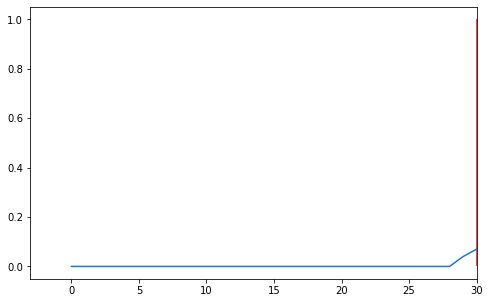

In [28]:
plt.plot(grid, vals)
plt.vlines([r1], 0, 1, colors=['red'])
plt.xlim(None, 30)
plt.show()

In [10]:
print("Success rate at r1:", vals[r1])

Success rate at r1: 1.0


## MNIST

In [86]:
env = Environment()

d_mnist_eff = 300

point_params = {
    'n': 10000,
    'd': 784,
    'point_type': "mnist_binary",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': d_mnist_eff // 10,
    'r2': d_mnist_eff // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 100,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'origin': 'isolated',
}

### Analysing dependance on t

In [87]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
new_exp_param = exp_params.copy()
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, new_exp_param, DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [88]:
mnist_data_succ_prob, mnist_data_queries = process_results(res)

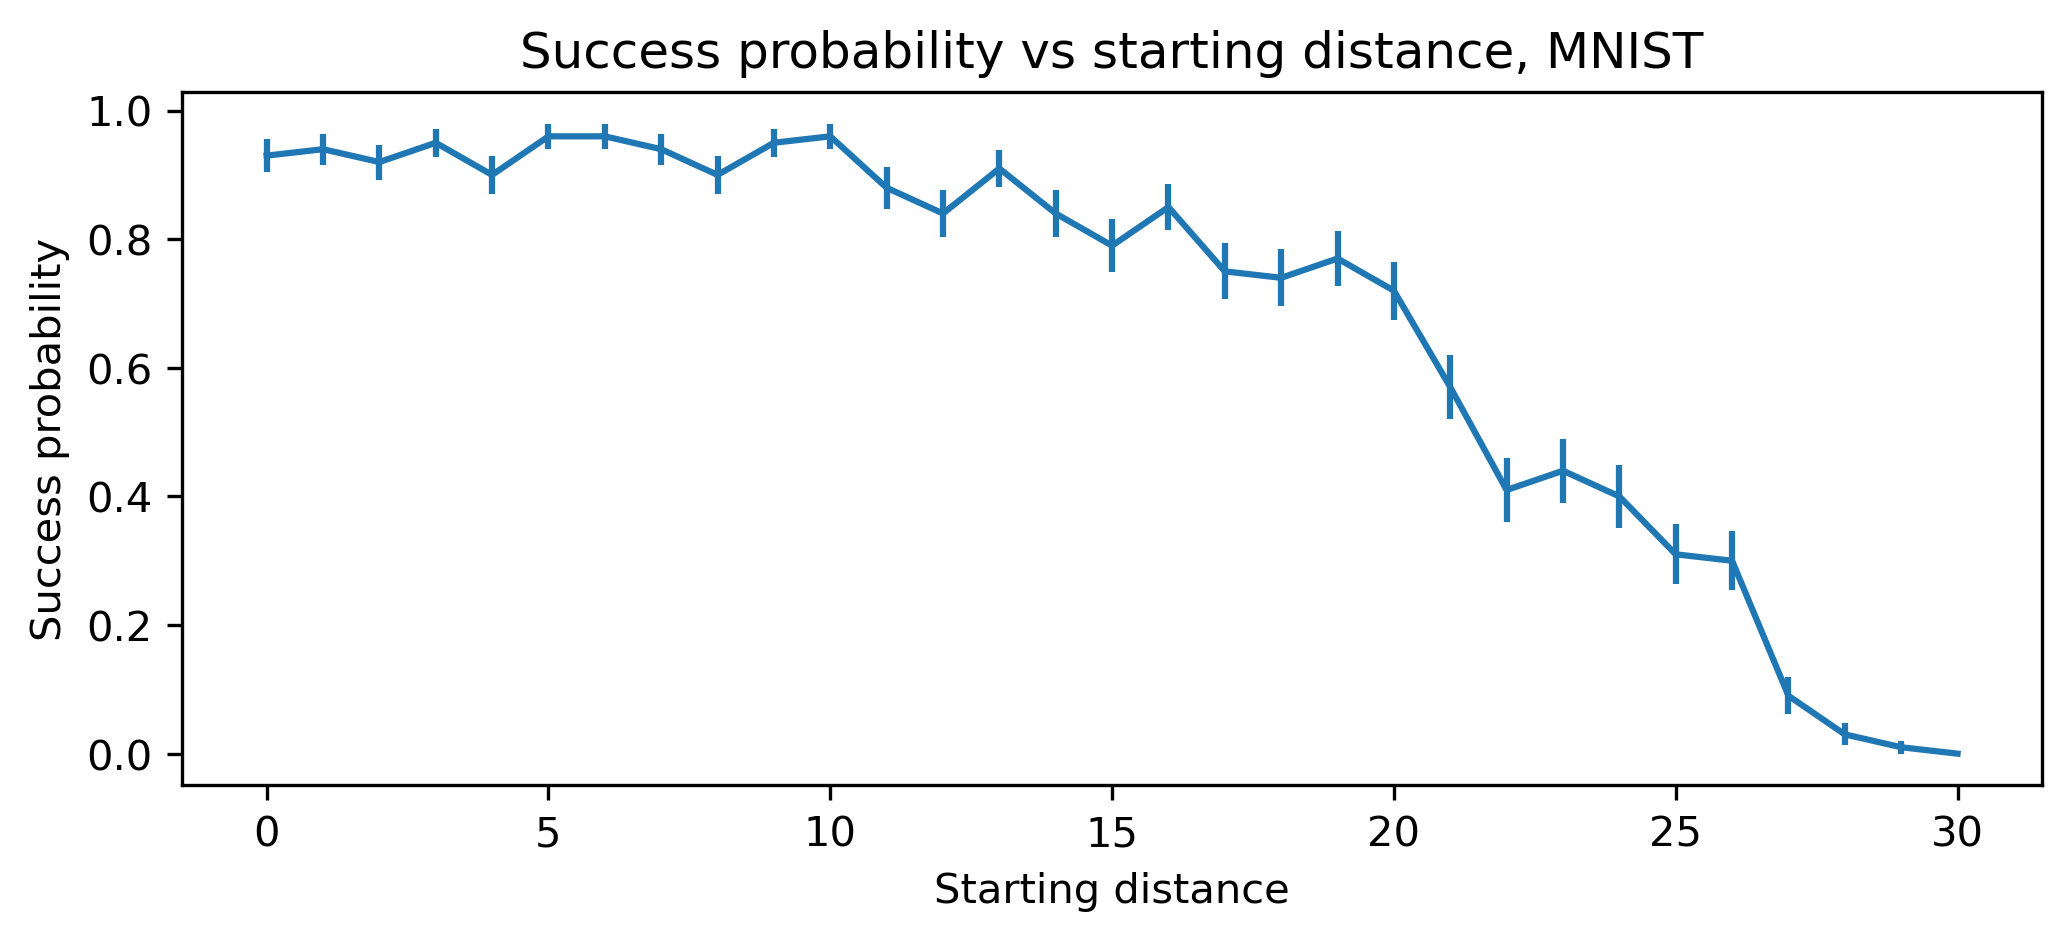

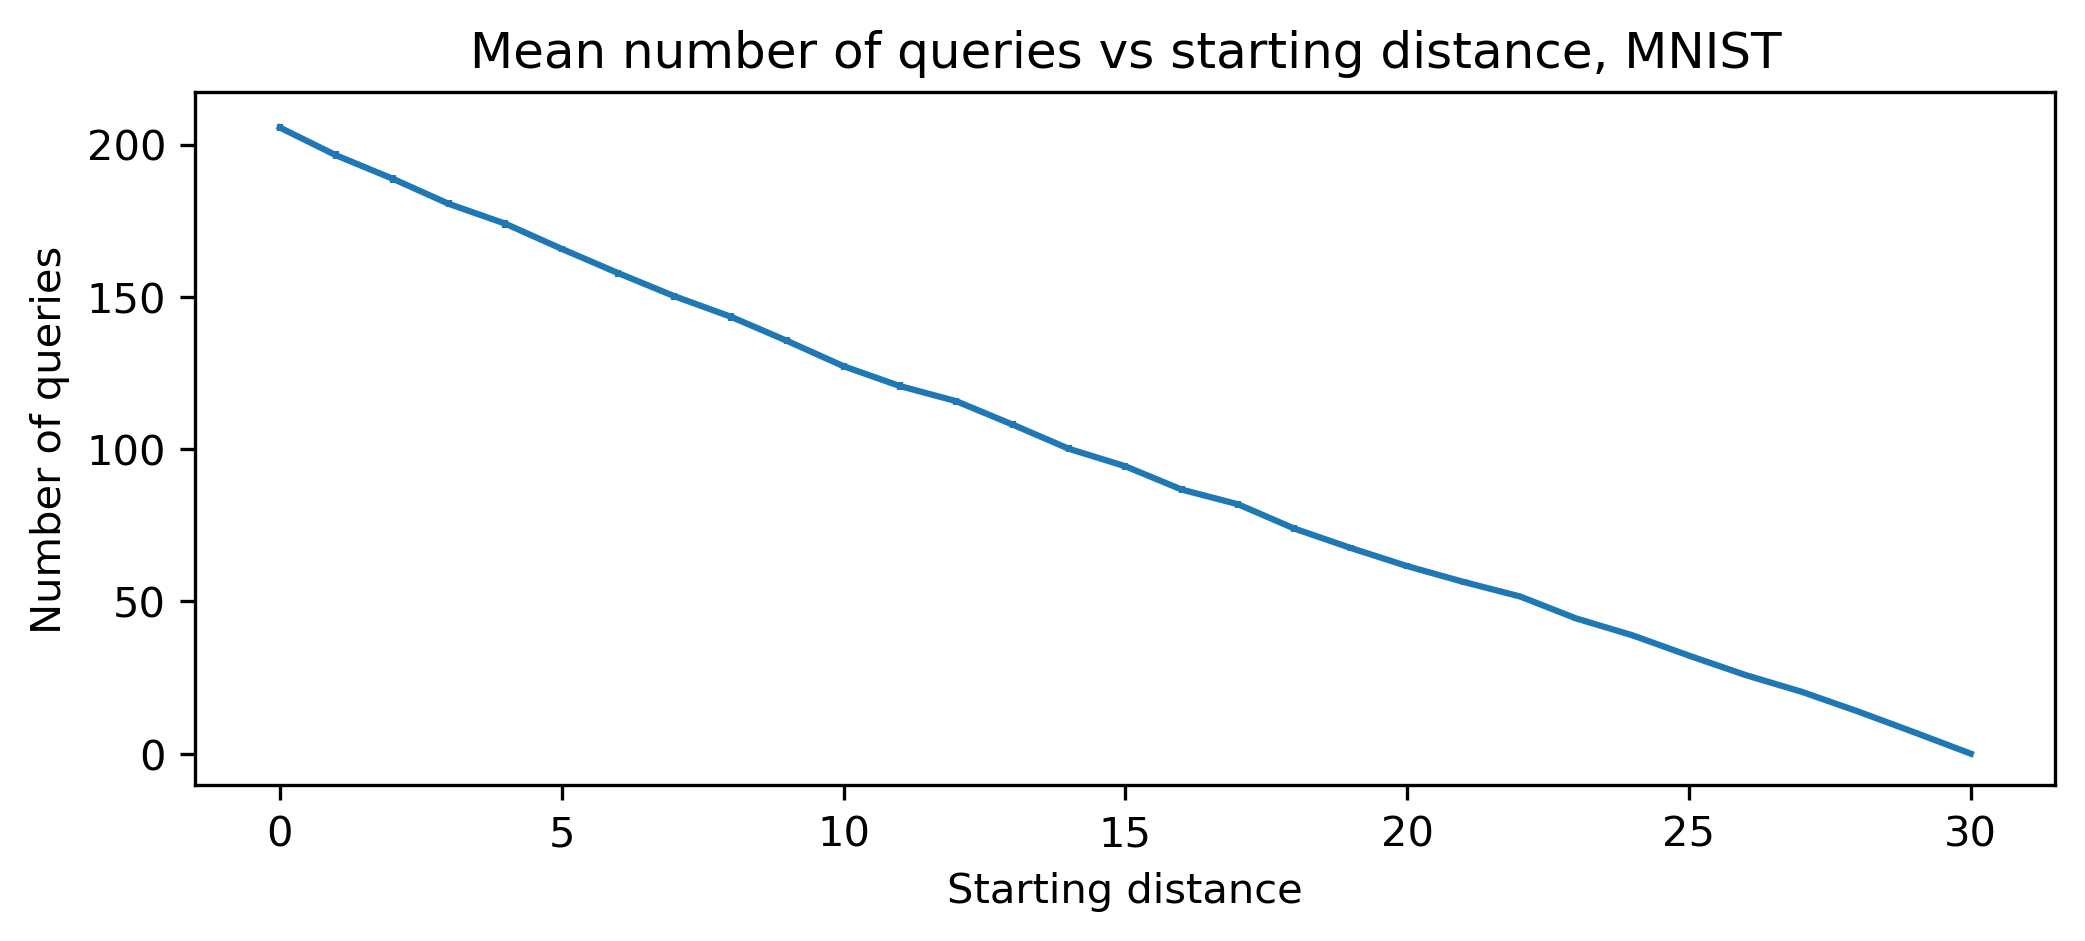

In [89]:
mnist_dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(mnist_dist_grid) - 1, np.max(mnist_dist_grid) + 1)

plt.errorbar(mnist_dist_grid, mnist_data_succ_prob[0], yerr=mnist_data_succ_prob[1])
# plt.xlim(xlims)
plt.title("Success probability vs starting distance, MNIST")
plt.xlabel("Starting distance")
plt.ylabel("Success probability")
save_fig("mnist-prob-starting-distance")
plt.show()

plt.errorbar(mnist_dist_grid, mnist_data_queries[0], yerr=mnist_data_queries[1])
# plt.xlim(xlims)
plt.title("Mean number of queries vs starting distance, MNIST")
plt.xlabel("Starting distance")
plt.ylabel("Number of queries")
save_fig("mnist-queries-starting-distance")
plt.show()

## Anonymous Microsoft Web Data

In [73]:
env = Environment()

d_target = 300

point_params = {
    'n': 1000,
    'd': 294,
    'point_type': "msweb",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': d_target // 10,
    'r2': d_target // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 100,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'origin': 'isolated',
}

### Analysing dependance on t

In [74]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
new_exp_param = exp_params.copy()
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, new_exp_param, DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [75]:
msweb_data_succ_prob, msweb_data_queries = process_results(res)

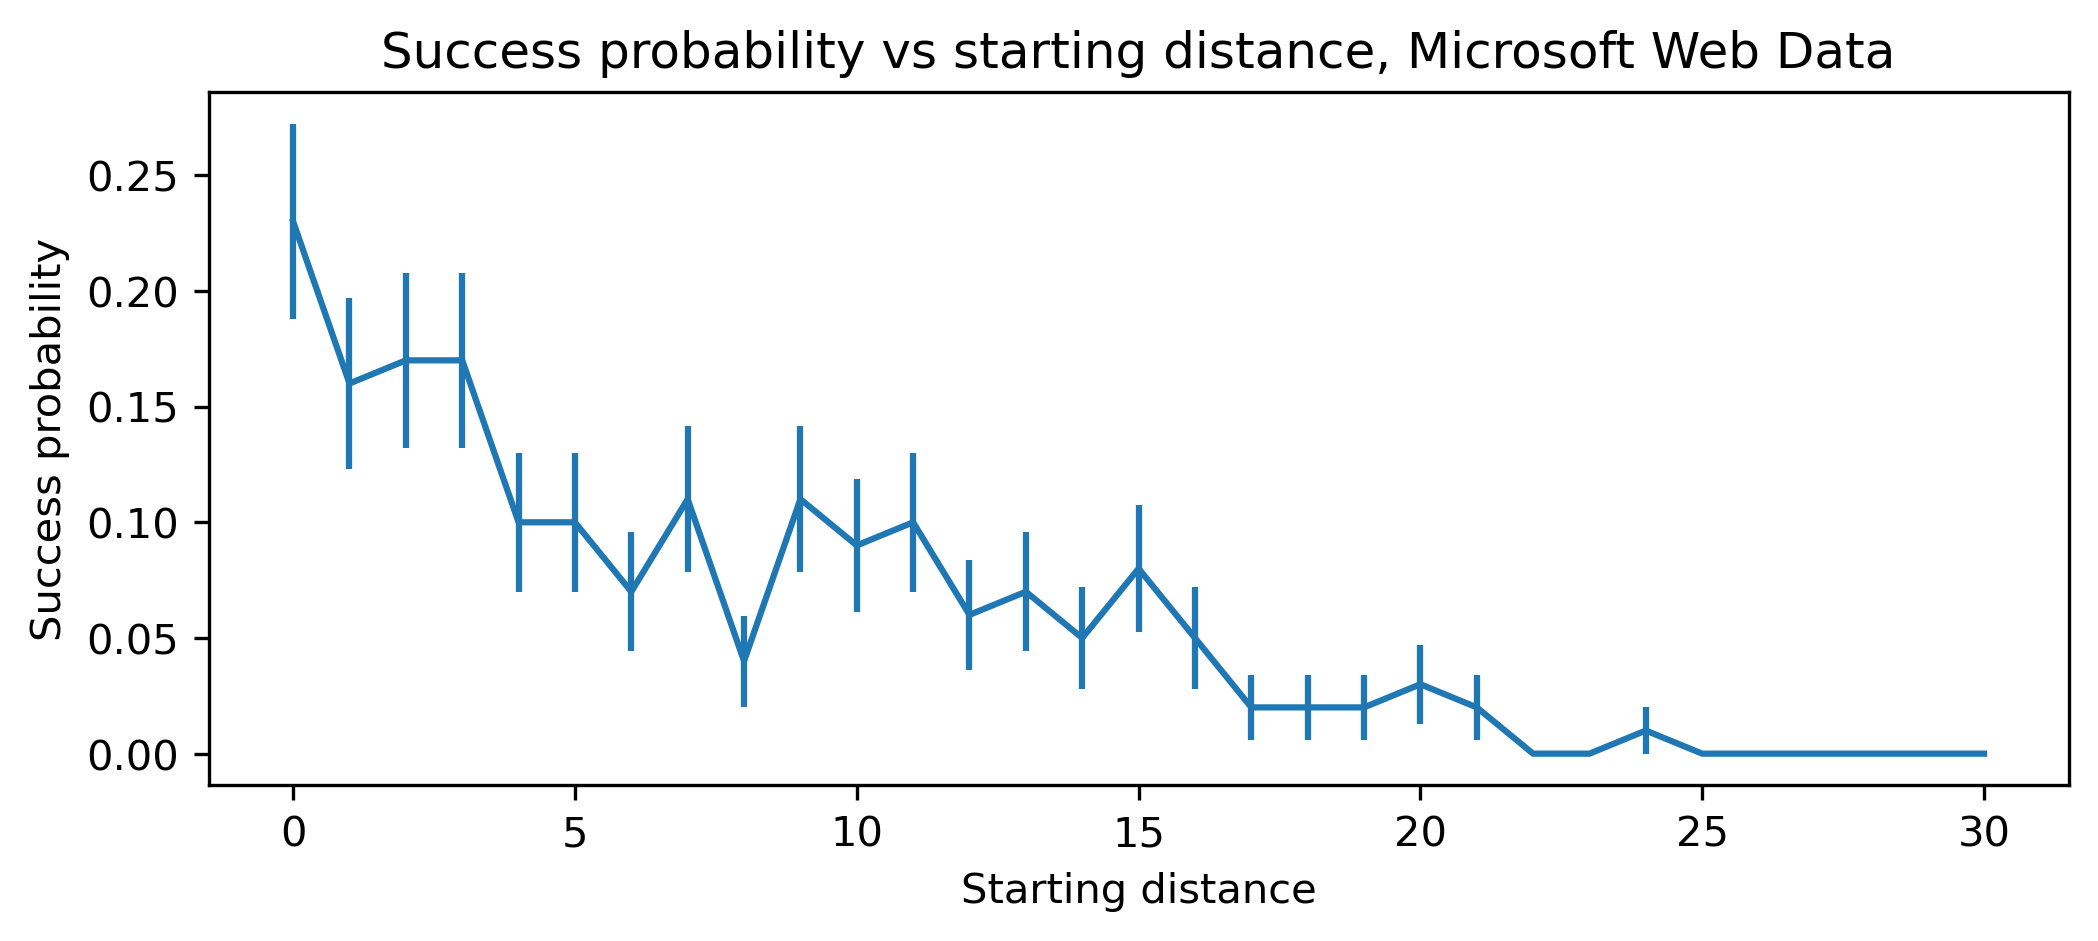

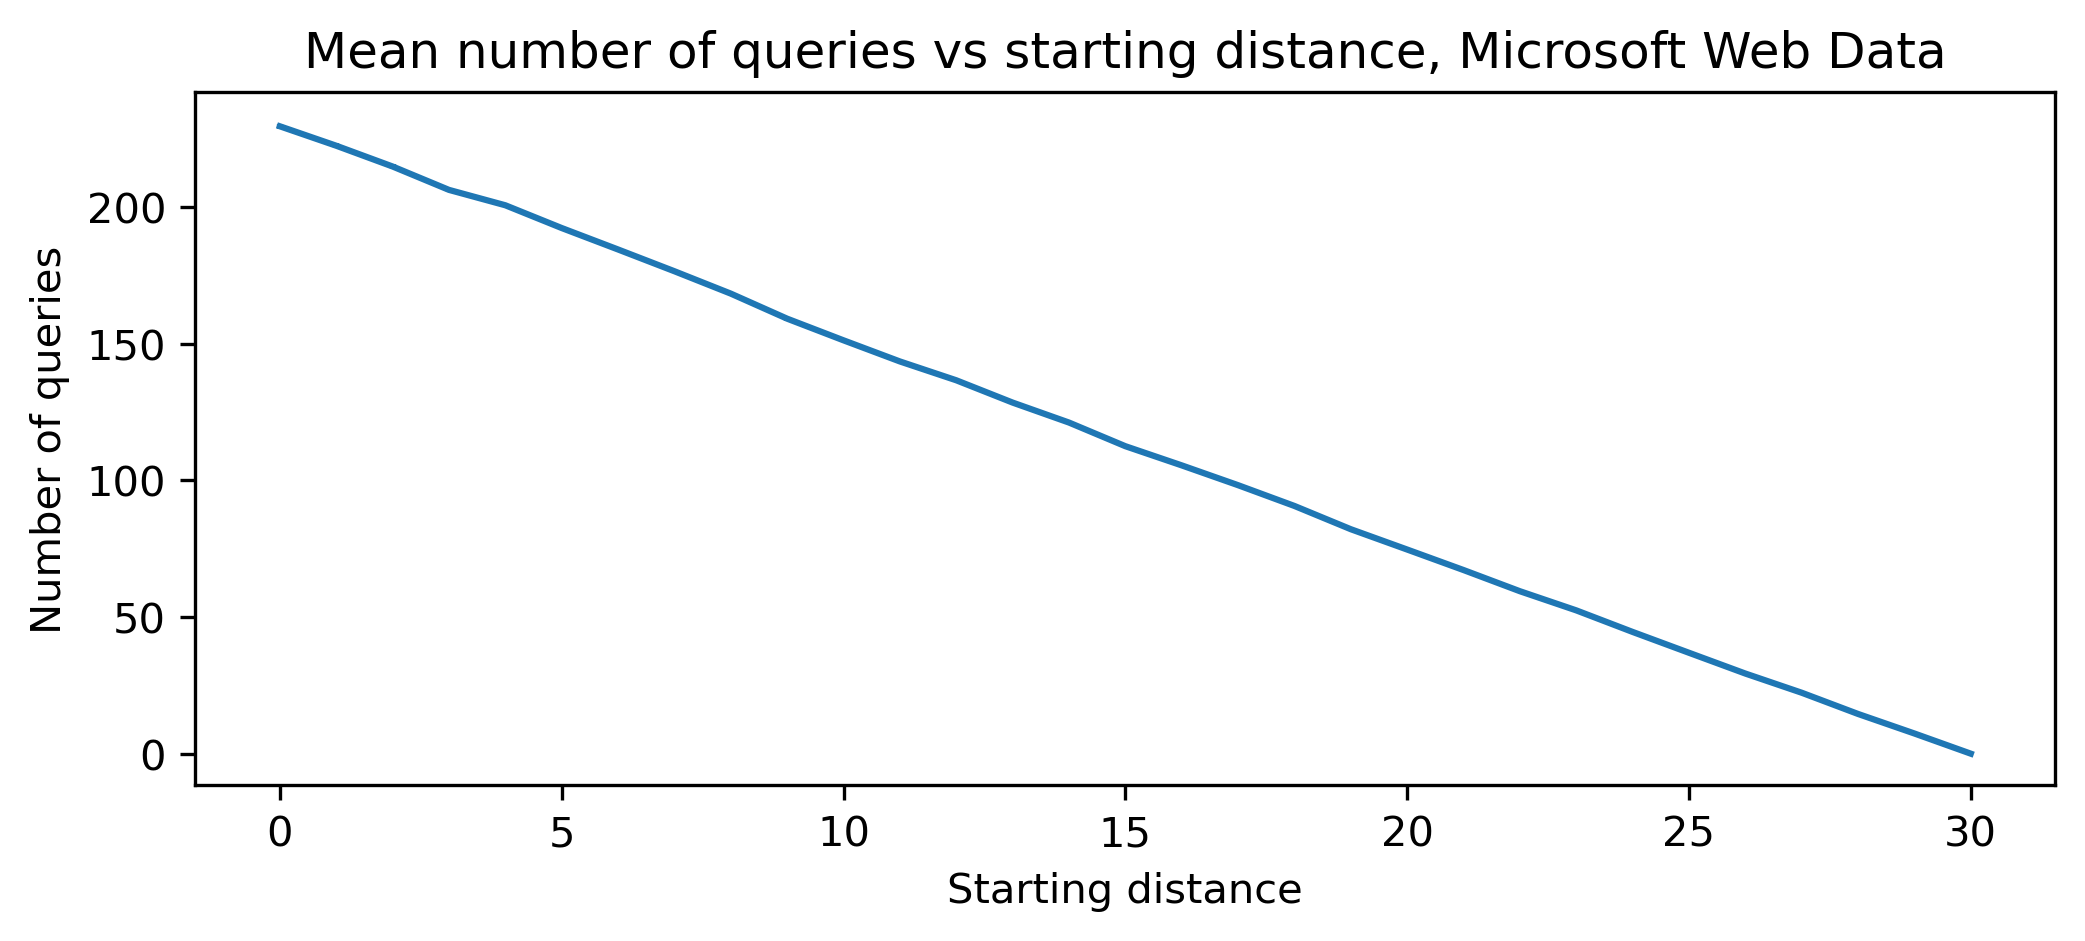

In [76]:
msweb_dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(msweb_dist_grid) - 1, np.max(msweb_dist_grid) + 1)

plt.errorbar(msweb_dist_grid, msweb_data_succ_prob[0], yerr=msweb_data_succ_prob[1])
# plt.xlim(xlims)
plt.title("Success probability vs starting distance, Microsoft Web Data")
plt.xlabel("Starting distance")
plt.ylabel("Success probability")
save_fig("msweb-prob-starting-distance")
plt.show()

plt.errorbar(msweb_dist_grid, msweb_data_queries[0], yerr=msweb_data_queries[1])
# plt.xlim(xlims)
plt.title("Mean number of queries vs starting distance, Microsoft Web Data")
plt.xlabel("Starting distance")
plt.ylabel("Number of queries")
save_fig("msweb-queries-starting-distance")
plt.show()

## Mushroom

In [82]:
env = Environment()

d_target = 300

point_params = {
    'n': 8124,
    'd': 116,
    'point_type': "mushroom",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': d_target // 10,
    'r2': d_target // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 100,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'origin': 'random',
}

### Analysing dependance on t

In [83]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
new_exp_param = exp_params.copy()
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, new_exp_param, DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [84]:
mushroom_data_succ_prob, mushroom_data_queries = process_results(res)

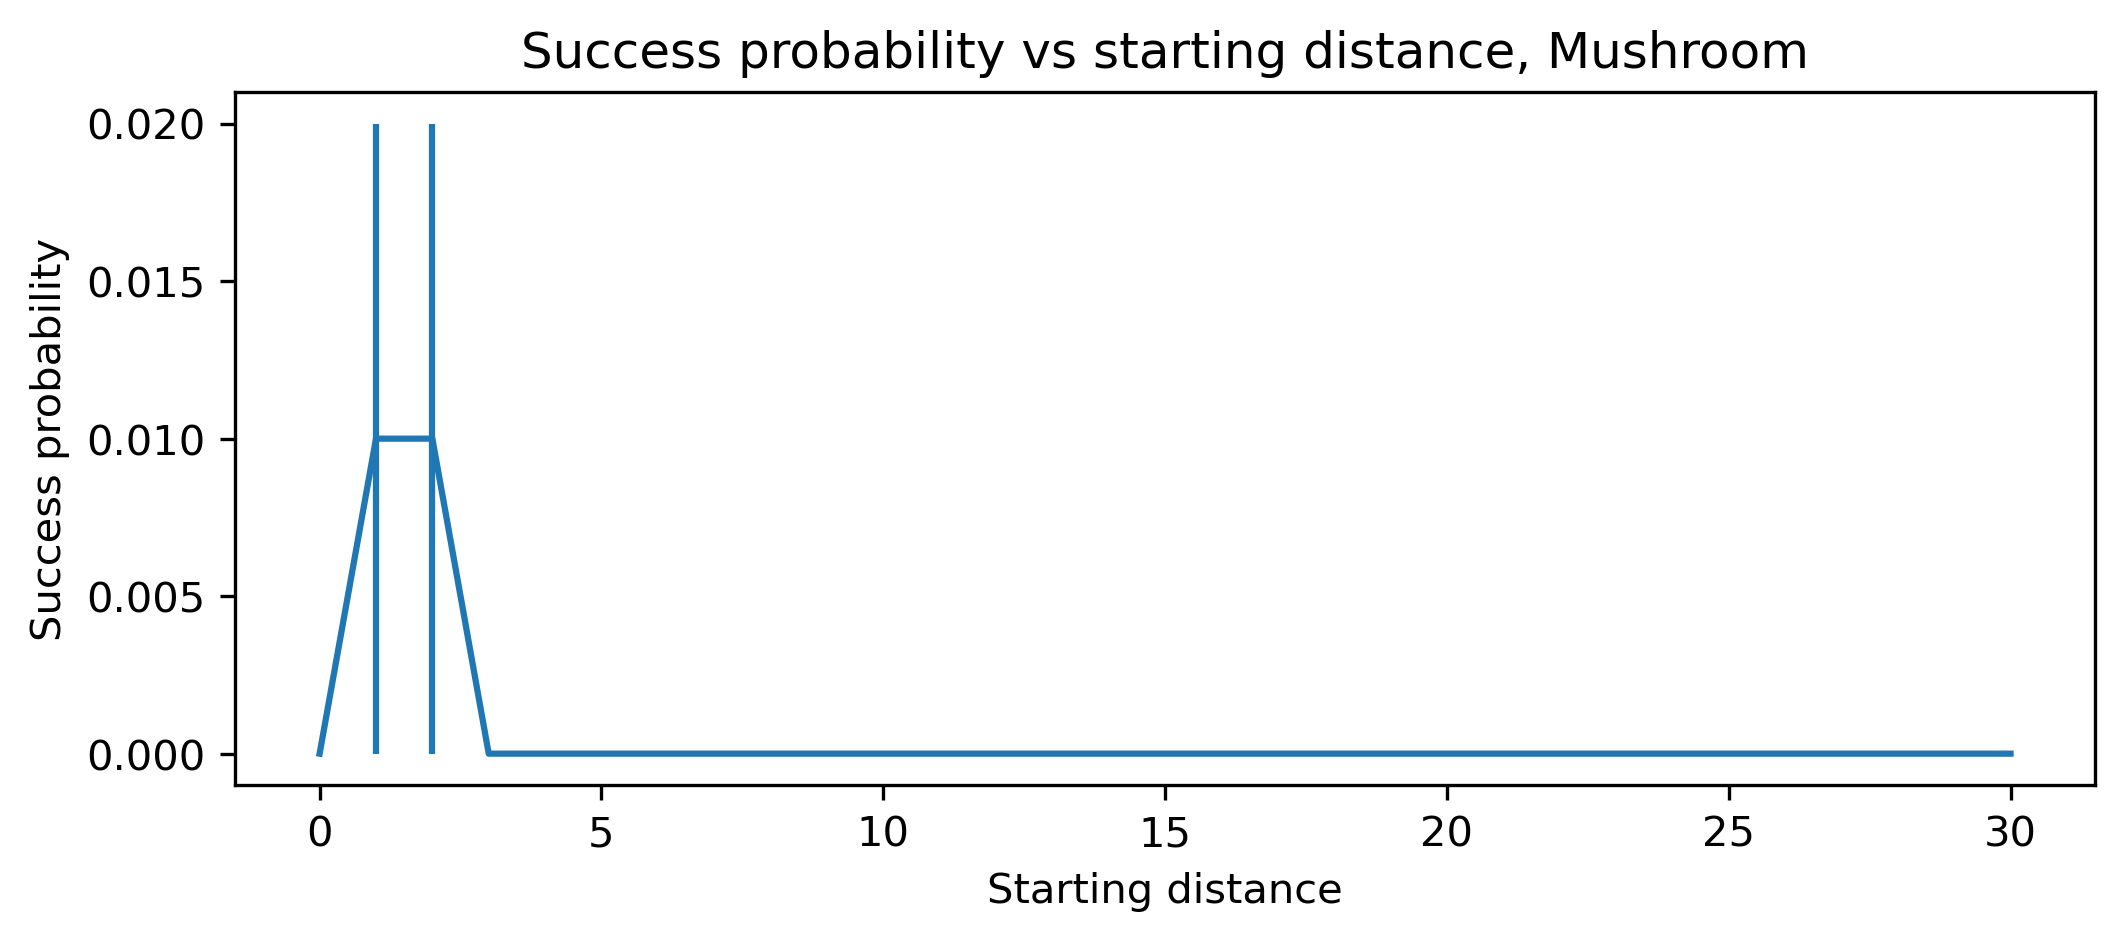

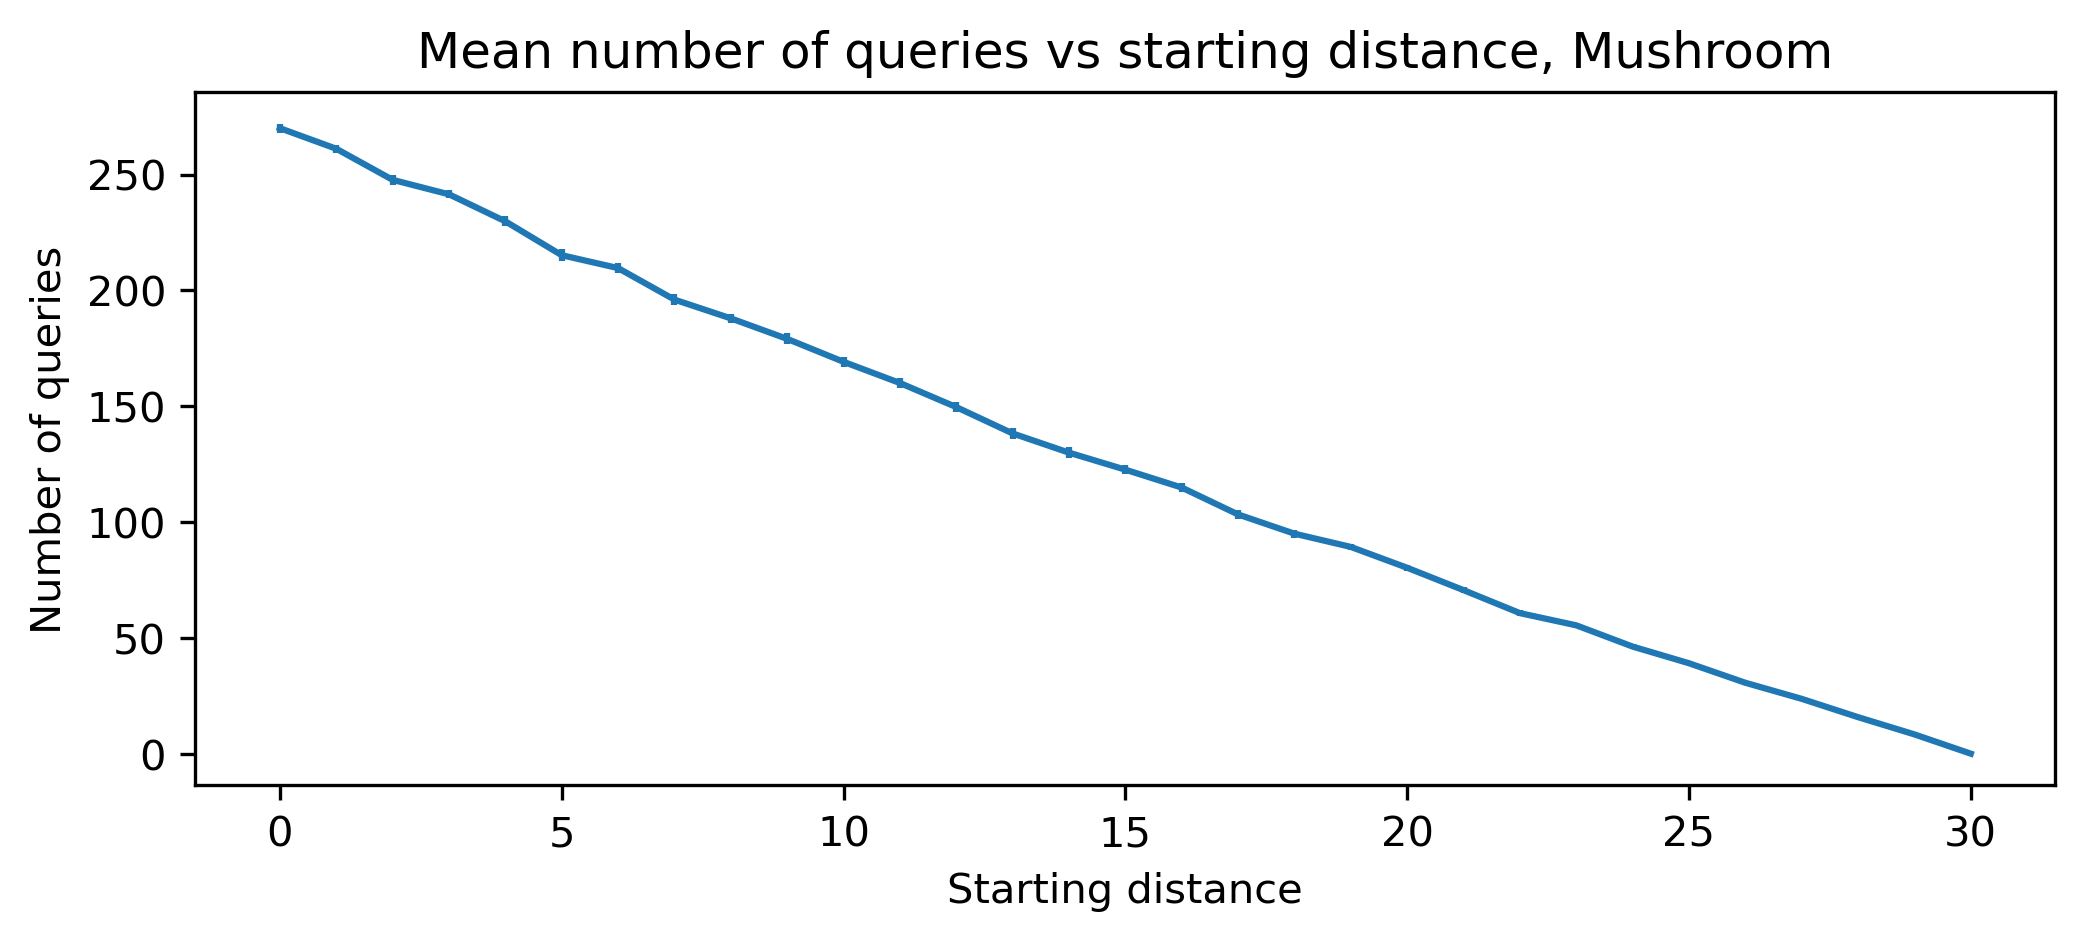

In [85]:
mushroom_dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(mushroom_dist_grid) - 1, np.max(mushroom_dist_grid) + 1)

plt.errorbar(mushroom_dist_grid, mushroom_data_succ_prob[0], yerr=mushroom_data_succ_prob[1])
# plt.xlim(xlims)
plt.title("Success probability vs starting distance, Mushroom")
plt.xlabel("Starting distance")
plt.ylabel("Success probability")
save_fig("mushroom-prob-starting-distance")
plt.show()

plt.errorbar(mushroom_dist_grid, mushroom_data_queries[0], yerr=mushroom_data_queries[1])
# plt.xlim(xlims)
plt.title("Mean number of queries vs starting distance, Mushroom")
plt.xlabel("Starting distance")
plt.ylabel("Number of queries")
save_fig("mushroom-queries-starting-distance")
plt.show()

## Sparse random points

In [67]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "random",
    'sample_probability': 1/1000,
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 100,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'origin': 'isolated',
}

### Analysing dependance on t

In [68]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
new_exp_param = exp_params.copy()
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, new_exp_param, DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [69]:
data_succ_prob, data_queries = process_results(res)

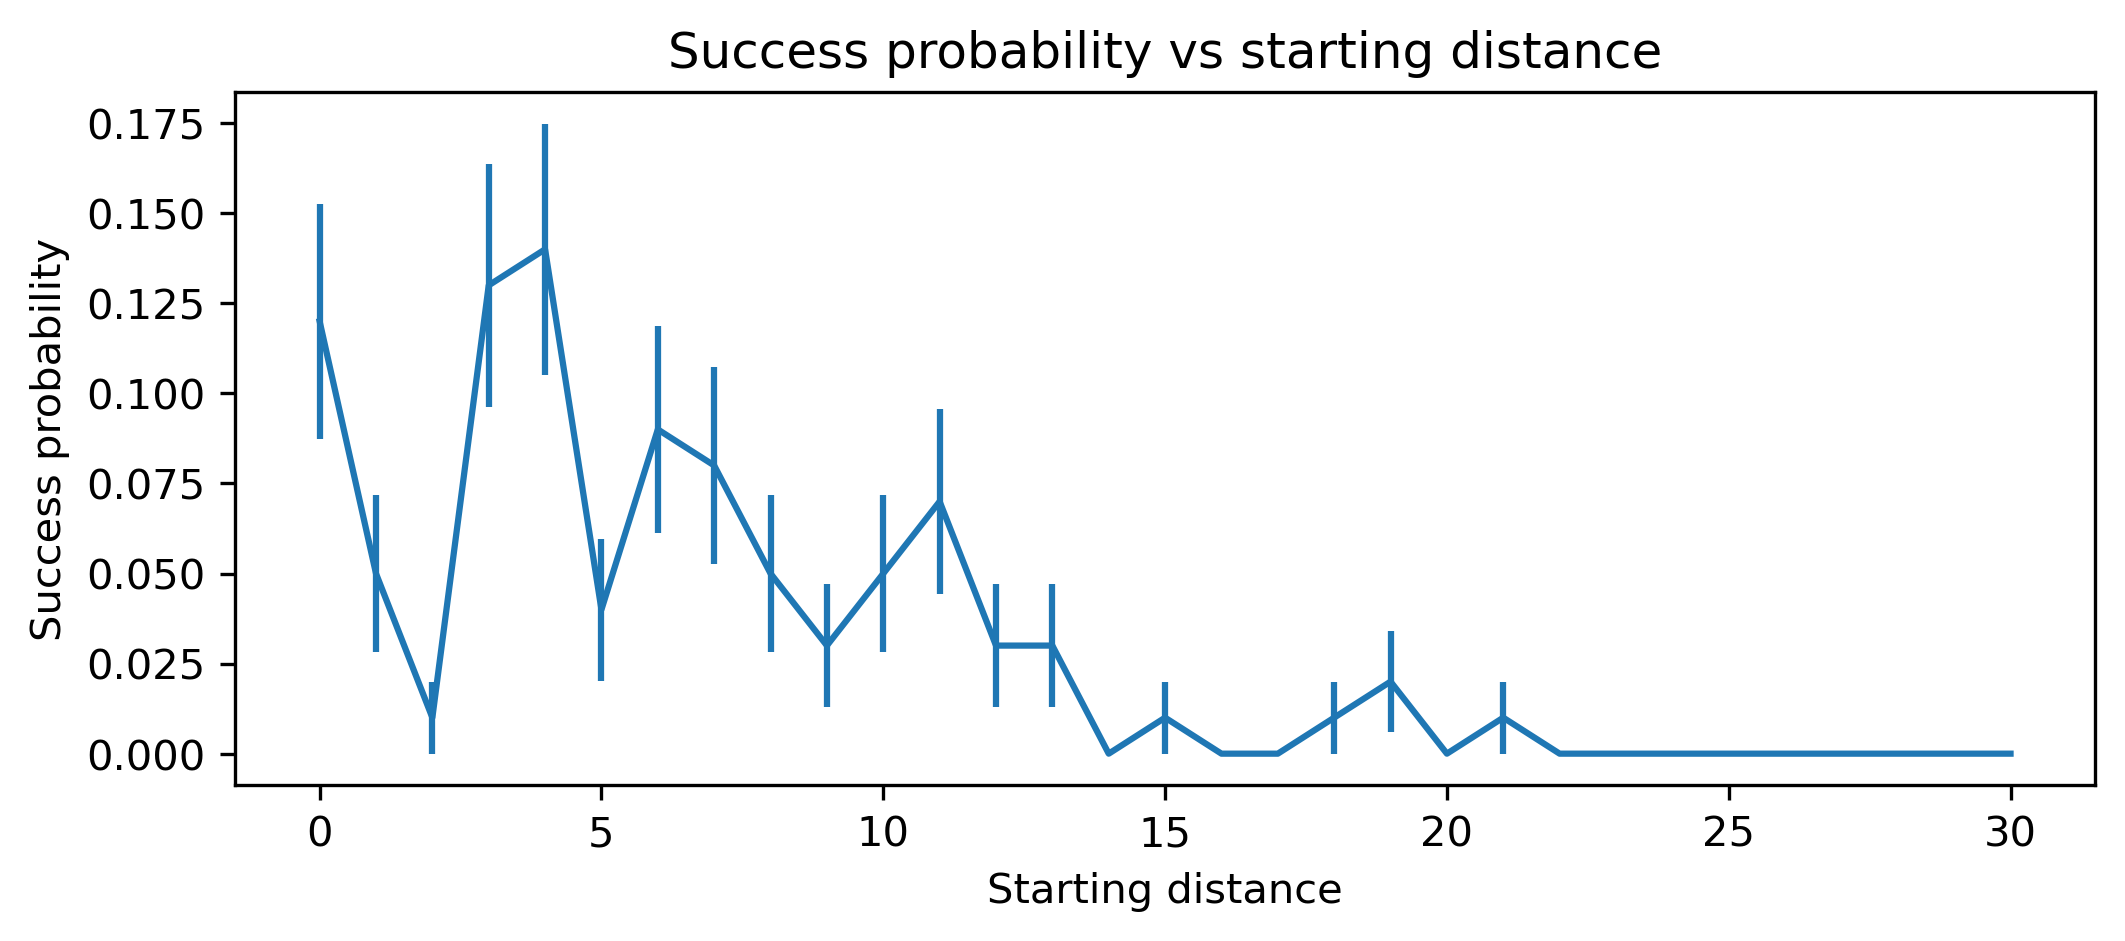

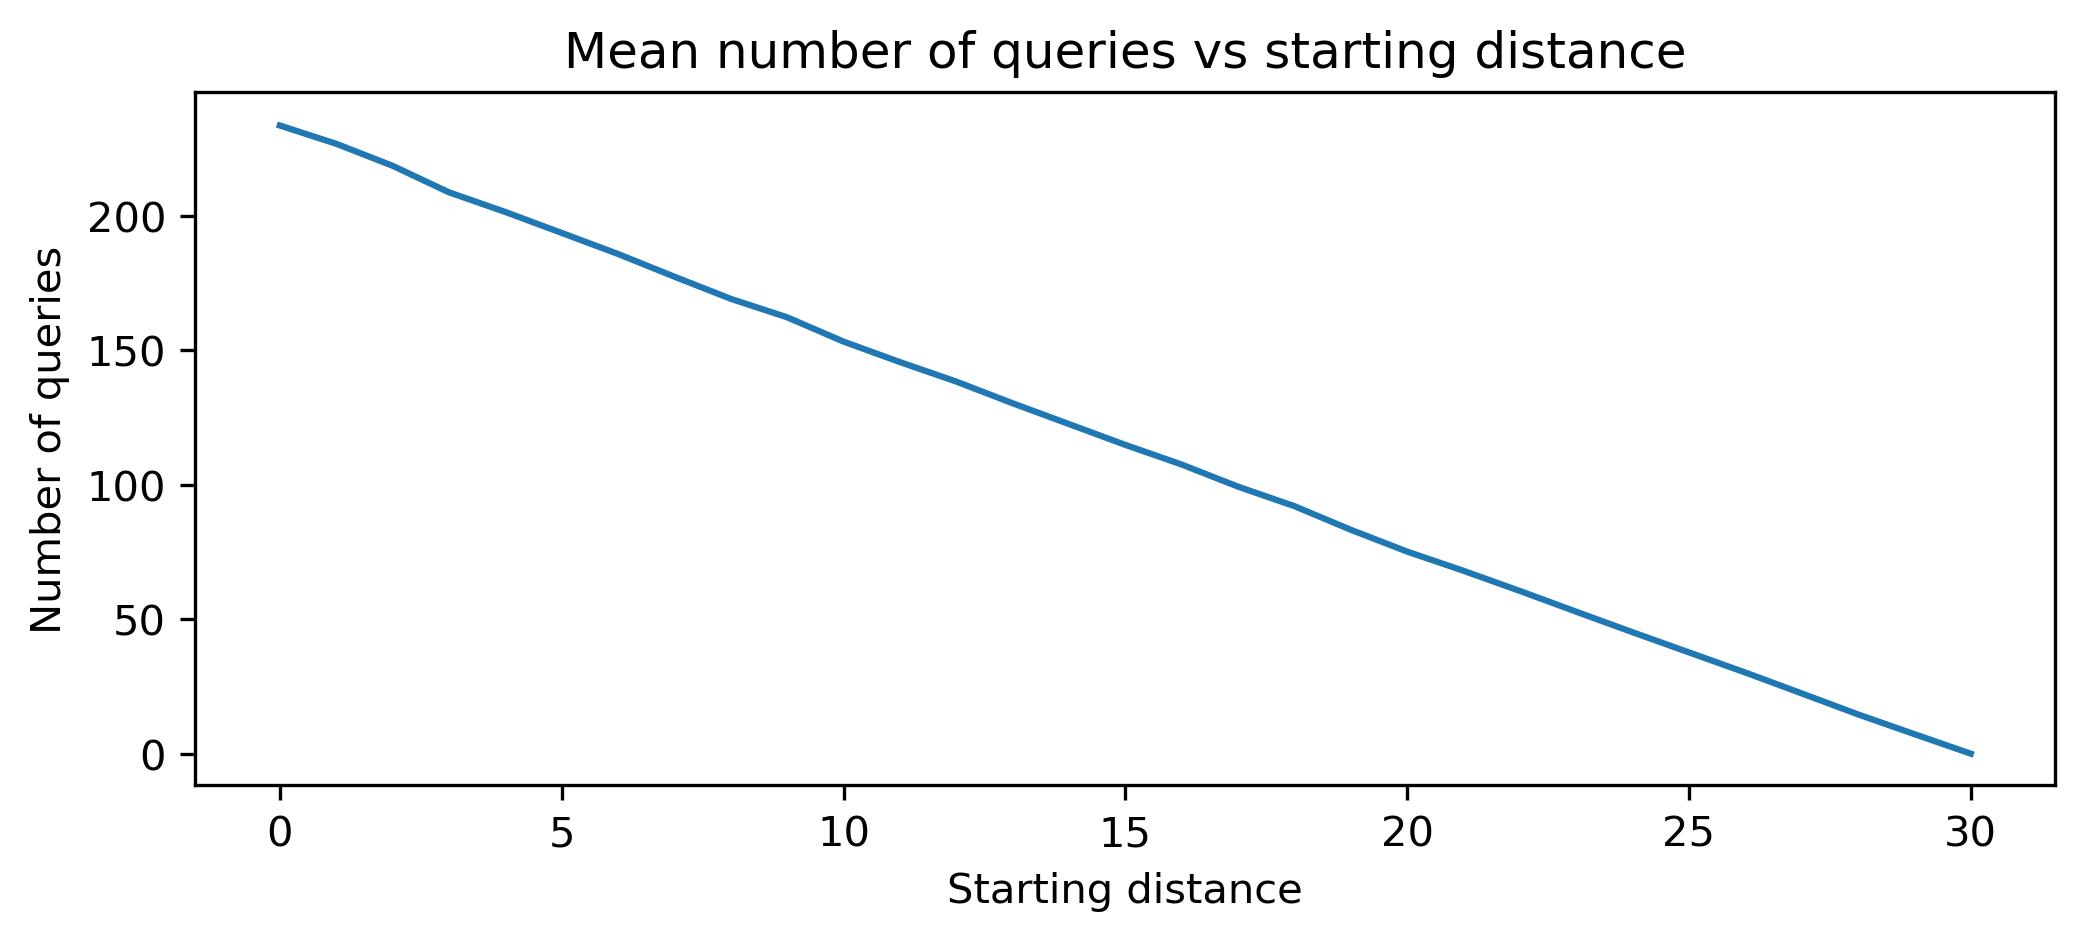

In [70]:
dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(dist_grid) - 1, np.max(dist_grid) + 1)

plt.errorbar(dist_grid, data_succ_prob[0], yerr=data_succ_prob[1], label="Sparse random")
# plt.xlim(xlims)
plt.title("Success probability vs starting distance")
plt.xlabel("Starting distance")
plt.ylabel("Success probability")
# save_fig("prob-starting-distance")

plt.show()

plt.errorbar(dist_grid, data_queries[0], yerr=data_queries[1], label='Sparse random')
# plt.xlim(xlims)
plt.title("Mean number of queries vs starting distance")
plt.xlabel("Starting distance")
plt.ylabel("Number of queries")
# save_fig("queries-starting-distance")


# plt.xlim(xlims)
# save_fig("mnist-queries-starting-distance")
plt.show()

# Breaking hamming LSH faster

In [9]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "zero",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

### Analysing dependance on t

In [10]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
new_exp_param = exp_params.copy()
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, new_exp_param, DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [11]:
data_succ_prob, data_queries = process_results(res)

NameError: name 'mnist_data_succ_prob' is not defined

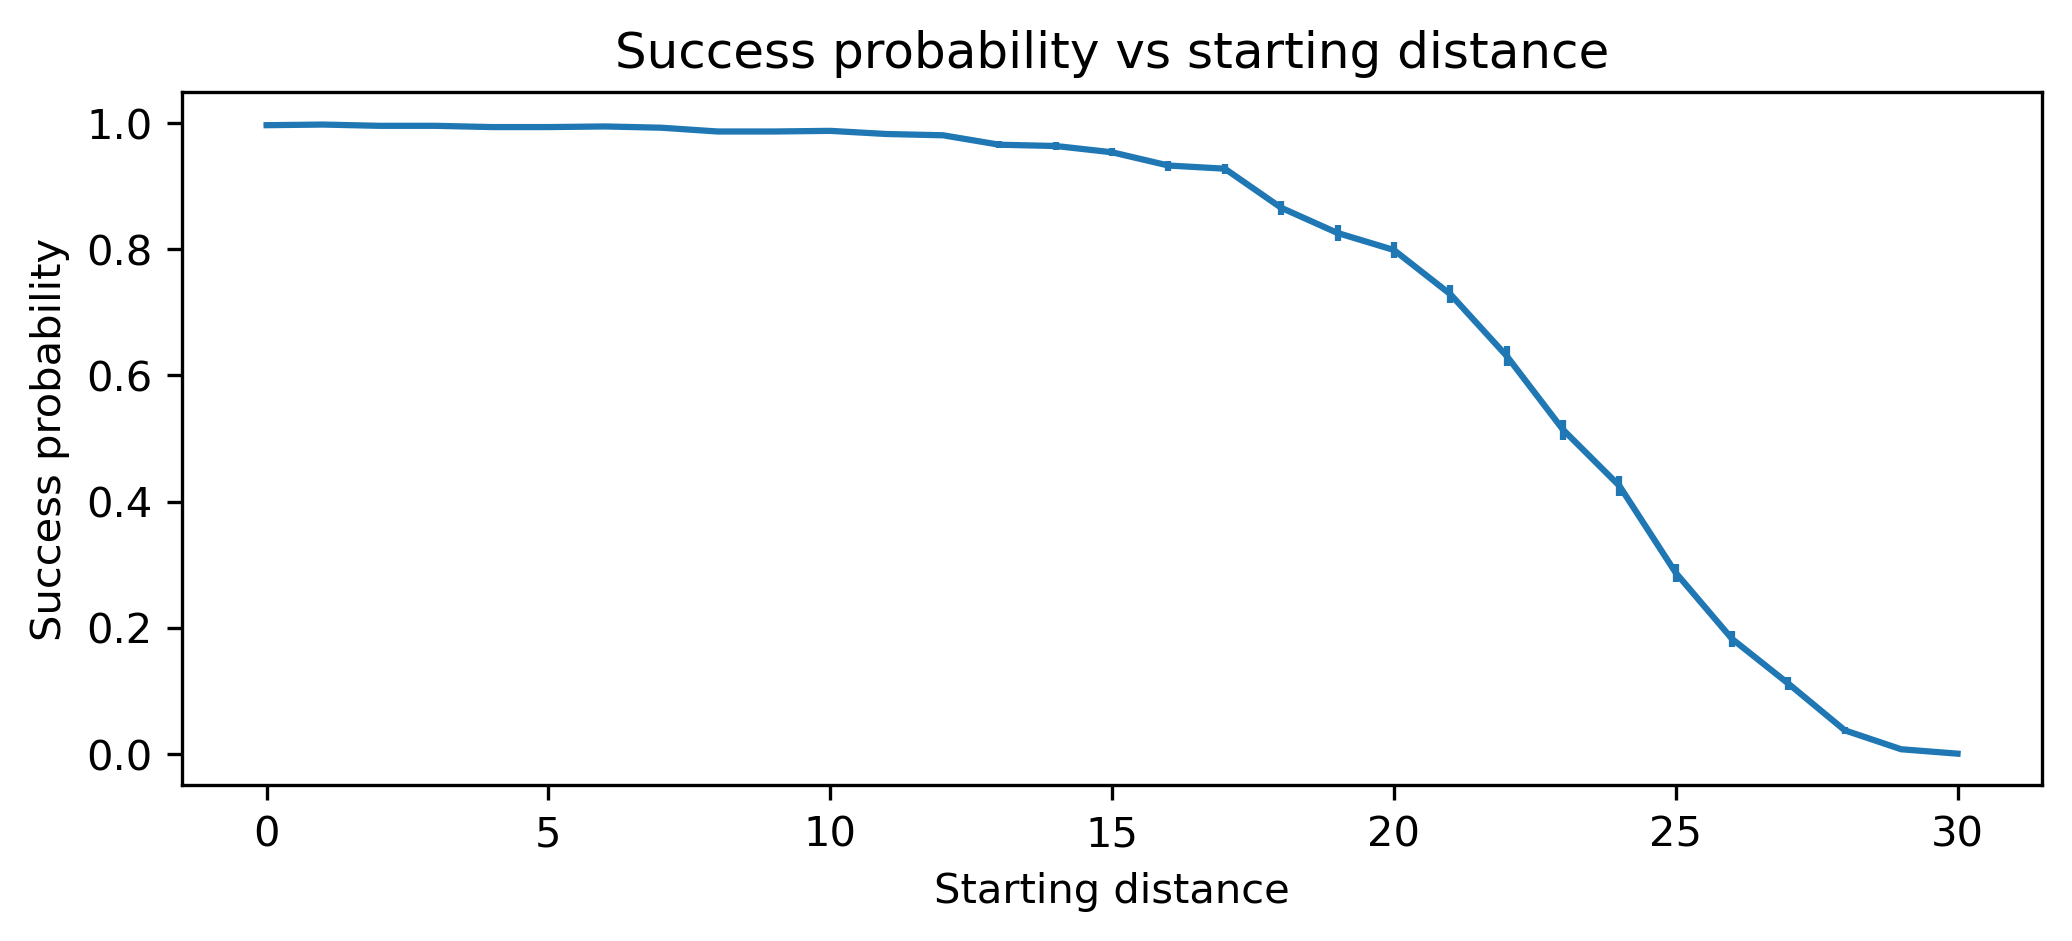

In [12]:
dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(dist_grid) - 1, np.max(dist_grid) + 1)

plt.errorbar(dist_grid, data_succ_prob[0], yerr=data_succ_prob[1], label="Zero")
# plt.xlim(xlims)
plt.title("Success probability vs starting distance")
plt.xlabel("Starting distance")
plt.ylabel("Success probability")
# save_fig("prob-starting-distance")

mnist_dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(mnist_dist_grid) - 1, np.max(mnist_dist_grid) + 1)

plt.errorbar(mnist_dist_grid, mnist_data_succ_prob[0], yerr=mnist_data_succ_prob[1], label="MNIST")

plt.legend()
plt.show()

plt.errorbar(dist_grid, data_queries[0], yerr=data_queries[1], label='Zero')
# plt.xlim(xlims)
plt.title("Mean number of queries vs starting distance")
plt.xlabel("Starting distance")
plt.ylabel("Number of queries")
# save_fig("queries-starting-distance")


plt.errorbar(mnist_dist_grid, mnist_data_queries[0], yerr=mnist_data_queries[1], label='MNIST')
# plt.xlim(xlims)
# save_fig("mnist-queries-starting-distance")
plt.legend()
plt.show()

### Dependance on $t$ with random points

In [176]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "random",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/16,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'change_points': True,
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

In [177]:
t_grid = np.arange(0, lsh_params['r1'] + 1, 1)
res = run_basic_grid_experiment(t_grid, 't', env, point_params, lsh_params, exp_params, data_dir=DATA_DIR)

  0%|          | 0/31 [00:00<?, ?it/s]

In [178]:
rand_data_succ_prob, rand_data_queries = process_results(res)

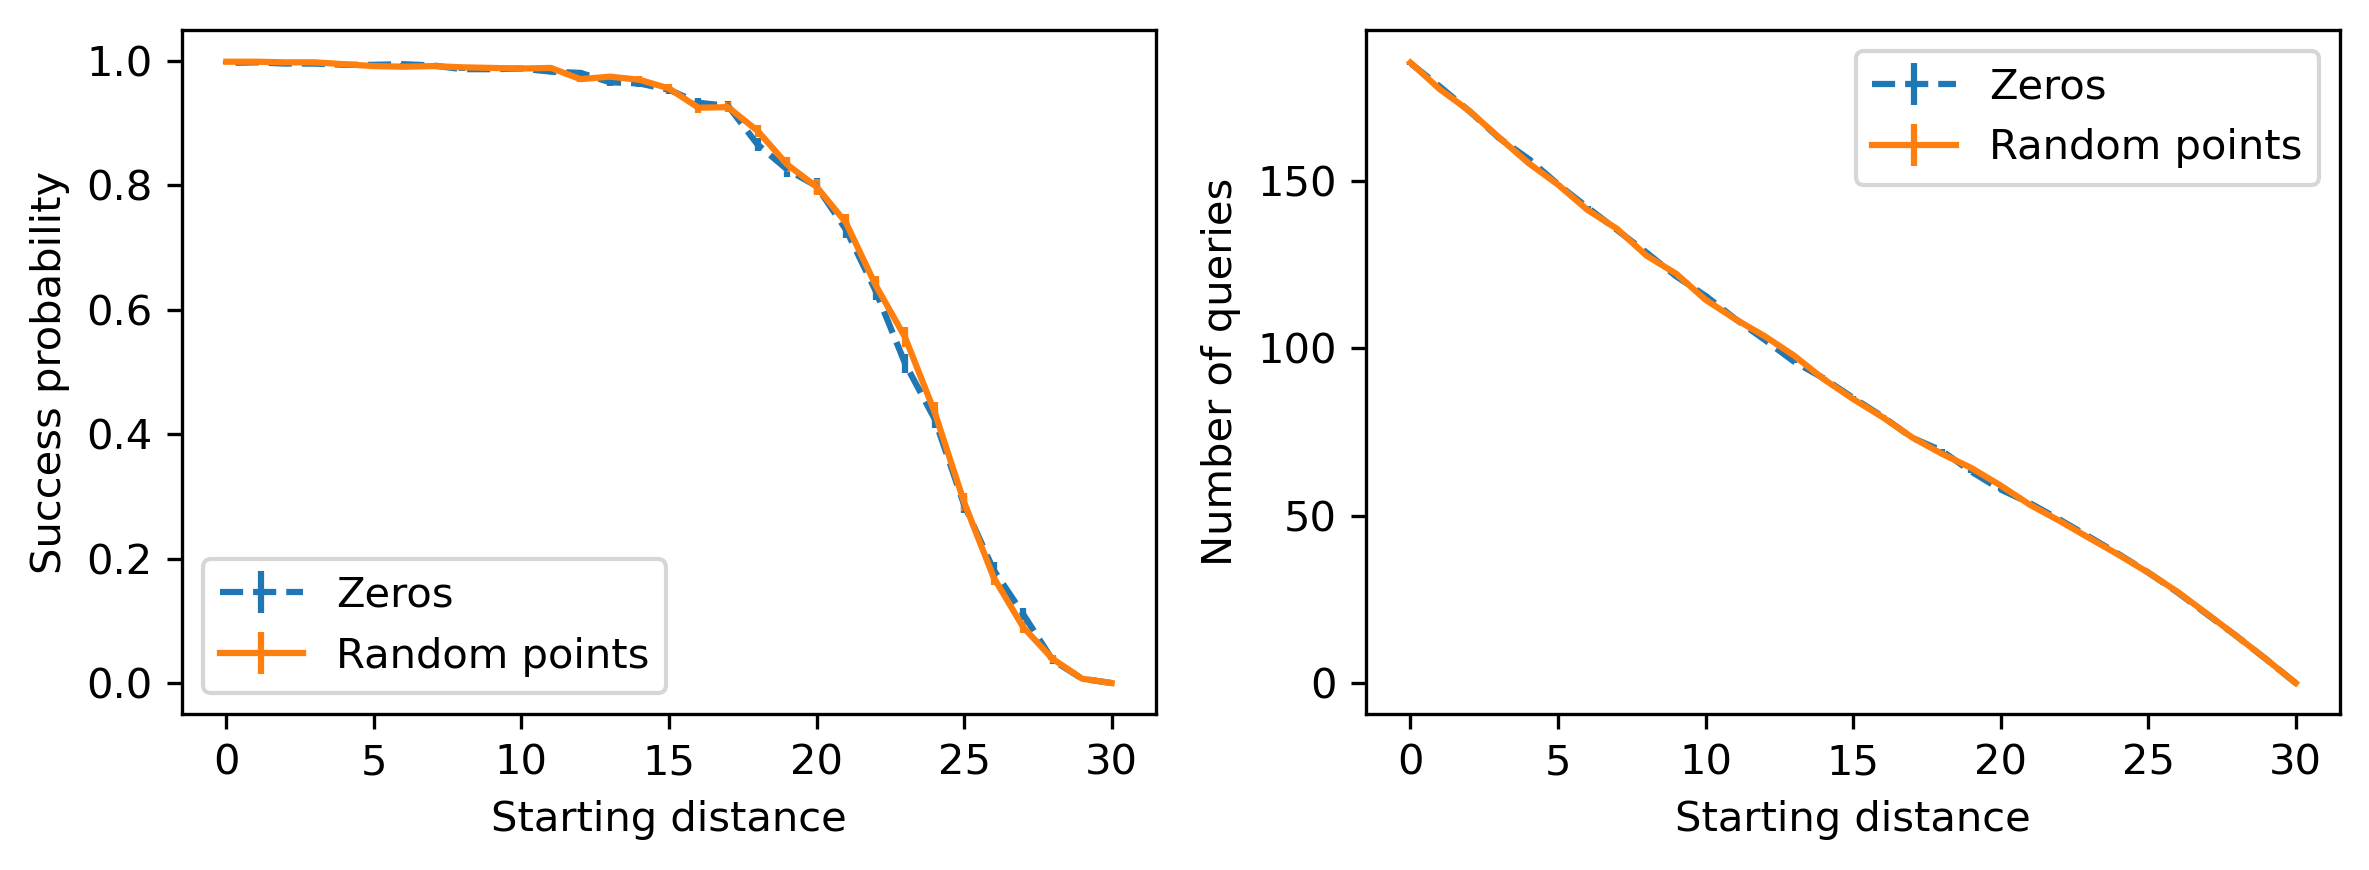

In [179]:
dist_grid = lsh_params['r1'] - t_grid
xlims = (np.min(dist_grid) - 1, np.max(dist_grid) + 1)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].errorbar(dist_grid, data_succ_prob[0], yerr=data_succ_prob[1], linestyle='--',label="Zeros")
axs[0].errorbar(dist_grid, rand_data_succ_prob[0], yerr=rand_data_succ_prob[1], label="Random points")
axs[0].legend()
# plt.xlim(xlims)
# plt.title("Success probability vs starting distance")
axs[0].set_xlabel("Starting distance")
axs[0].set_ylabel("Success probability")
# save_fig("all-prob-starting-distance")

axs[1].errorbar(dist_grid, data_queries[0], yerr=data_queries[1], linestyle='--', label='Zeros')
axs[1].errorbar(dist_grid, rand_data_queries[0], yerr=rand_data_queries[1], label='Random points')
axs[1].legend()
# plt.xlim(xlims)
# plt.title("Number of queries vs starting distance")
axs[1].set_xlabel("Starting distance")
axs[1].set_ylabel("Number of queries")
fig.tight_layout()
# save_fig("all-queries-starting-distance")
save_fig("all-all-starting-distance")
plt.show()

### Analysing dependance on radius

In [99]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "zero",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/5,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

In [100]:
grid = np.arange(0, lsh_params['r1'], 1)
res = run_basic_grid_experiment(grid, 'target_distance', env, point_params, lsh_params, exp_params, data_dir=DATA_DIR)

  0%|          | 0/30 [00:00<?, ?it/s]

In [101]:
data_succ_prob, data_queries = process_results(res)

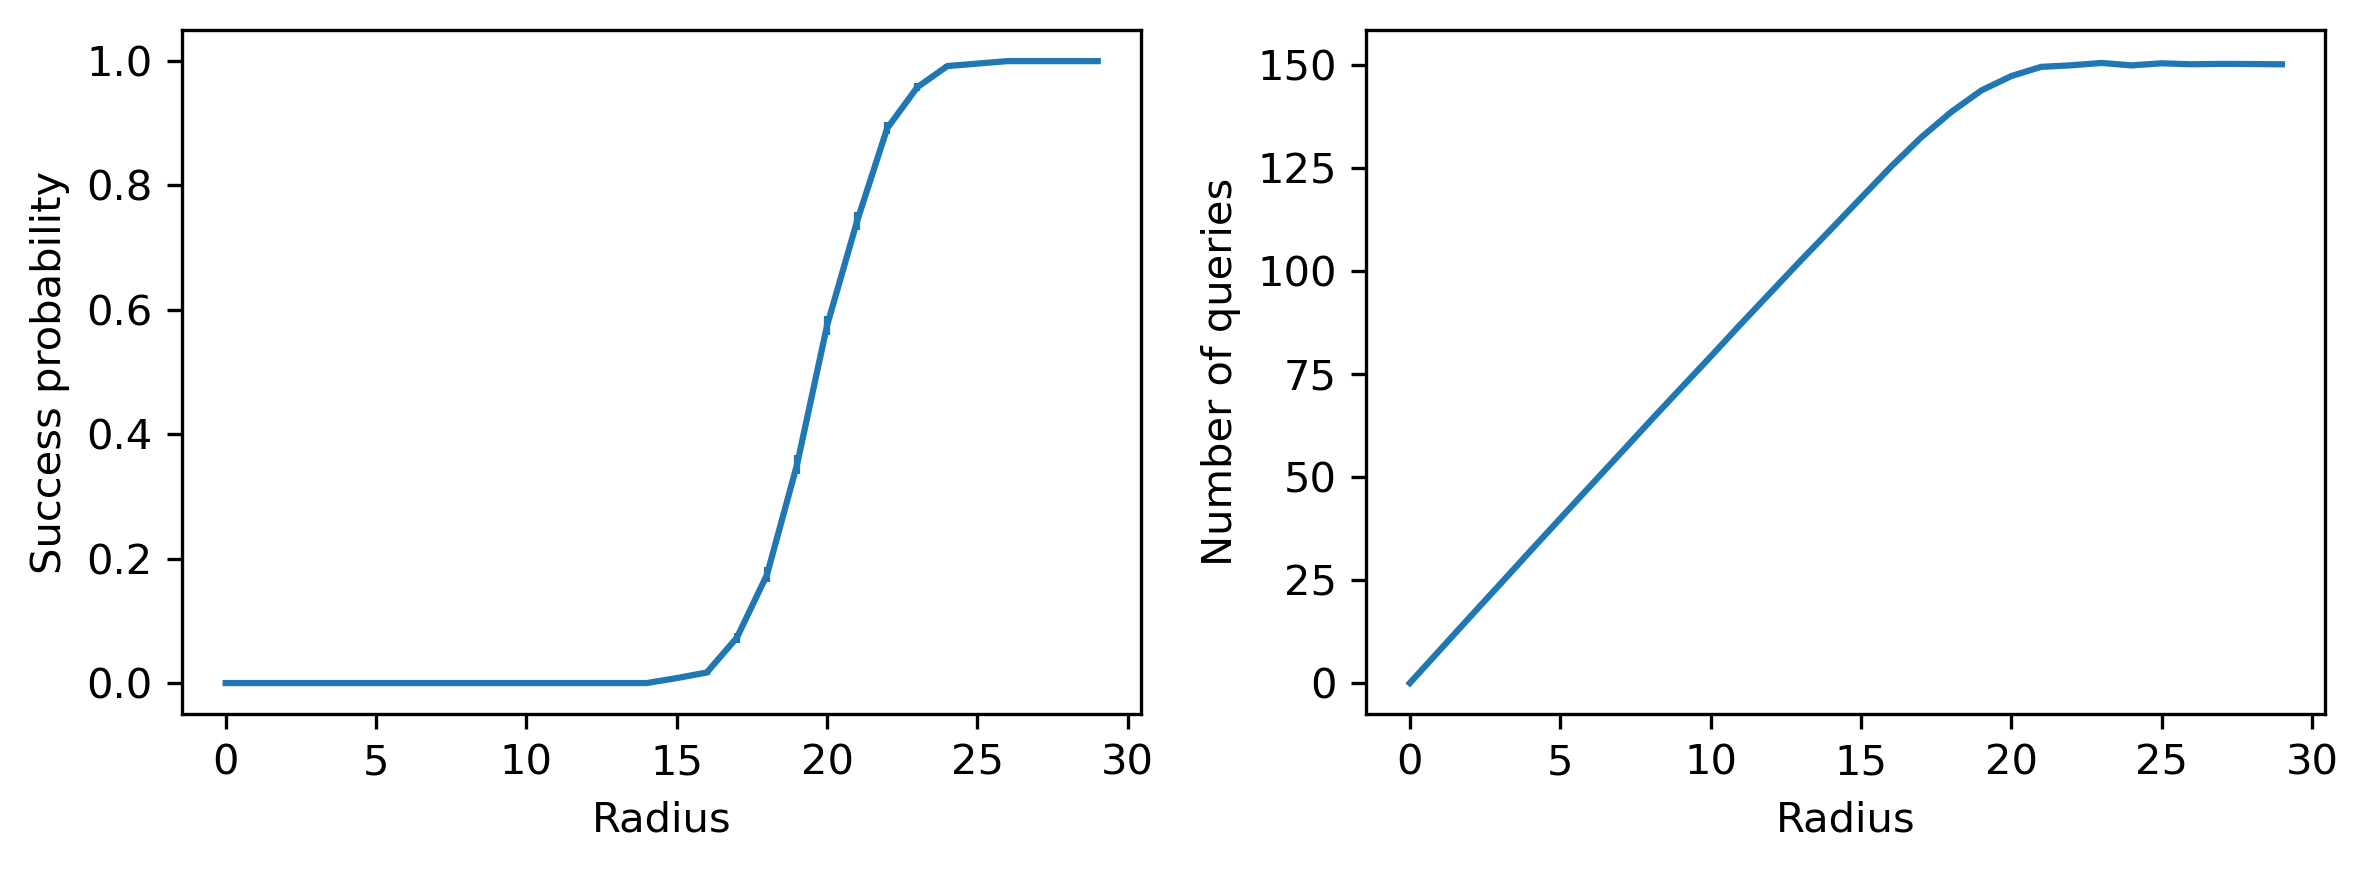

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].errorbar(grid, data_succ_prob[0], yerr=data_succ_prob[1])
# plt.xlim(xlims)
# plt.yscale("log")
axs[0].set_xlabel("Radius")
axs[0].set_ylabel("Success probability")

axs[1].errorbar(grid, data_queries[0], yerr=data_queries[1])
# plt.xlim(xlims)
axs[1].set_xlabel("Radius")
axs[1].set_ylabel("Number of queries")

fig.tight_layout()
# save_fig("all-all-starting-distance")
save_fig("all-radius")
plt.show()

### Search for infliction point

In [121]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "zero",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/2,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

In [122]:
help_list = np.arange(1, 14, 3)
delta_list = np.exp2(-help_list)

my_rho = np.log(1 - lsh_params['r1']/point_params['d']) / np.log(1 - lsh_params['r2']/point_params['d'])
my_L = int(np.ceil(np.power(point_params['n'], my_rho)))
L_list = help_list * my_L

grid = np.arange(0, lsh_params['r2'], 1)

all_res = []

for dl in delta_list:
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    res = run_basic_grid_experiment(grid, 'target_distance', env, point_params, new_lsh_params, exp_params, data_dir=DATA_DIR)
    all_res.append(res)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

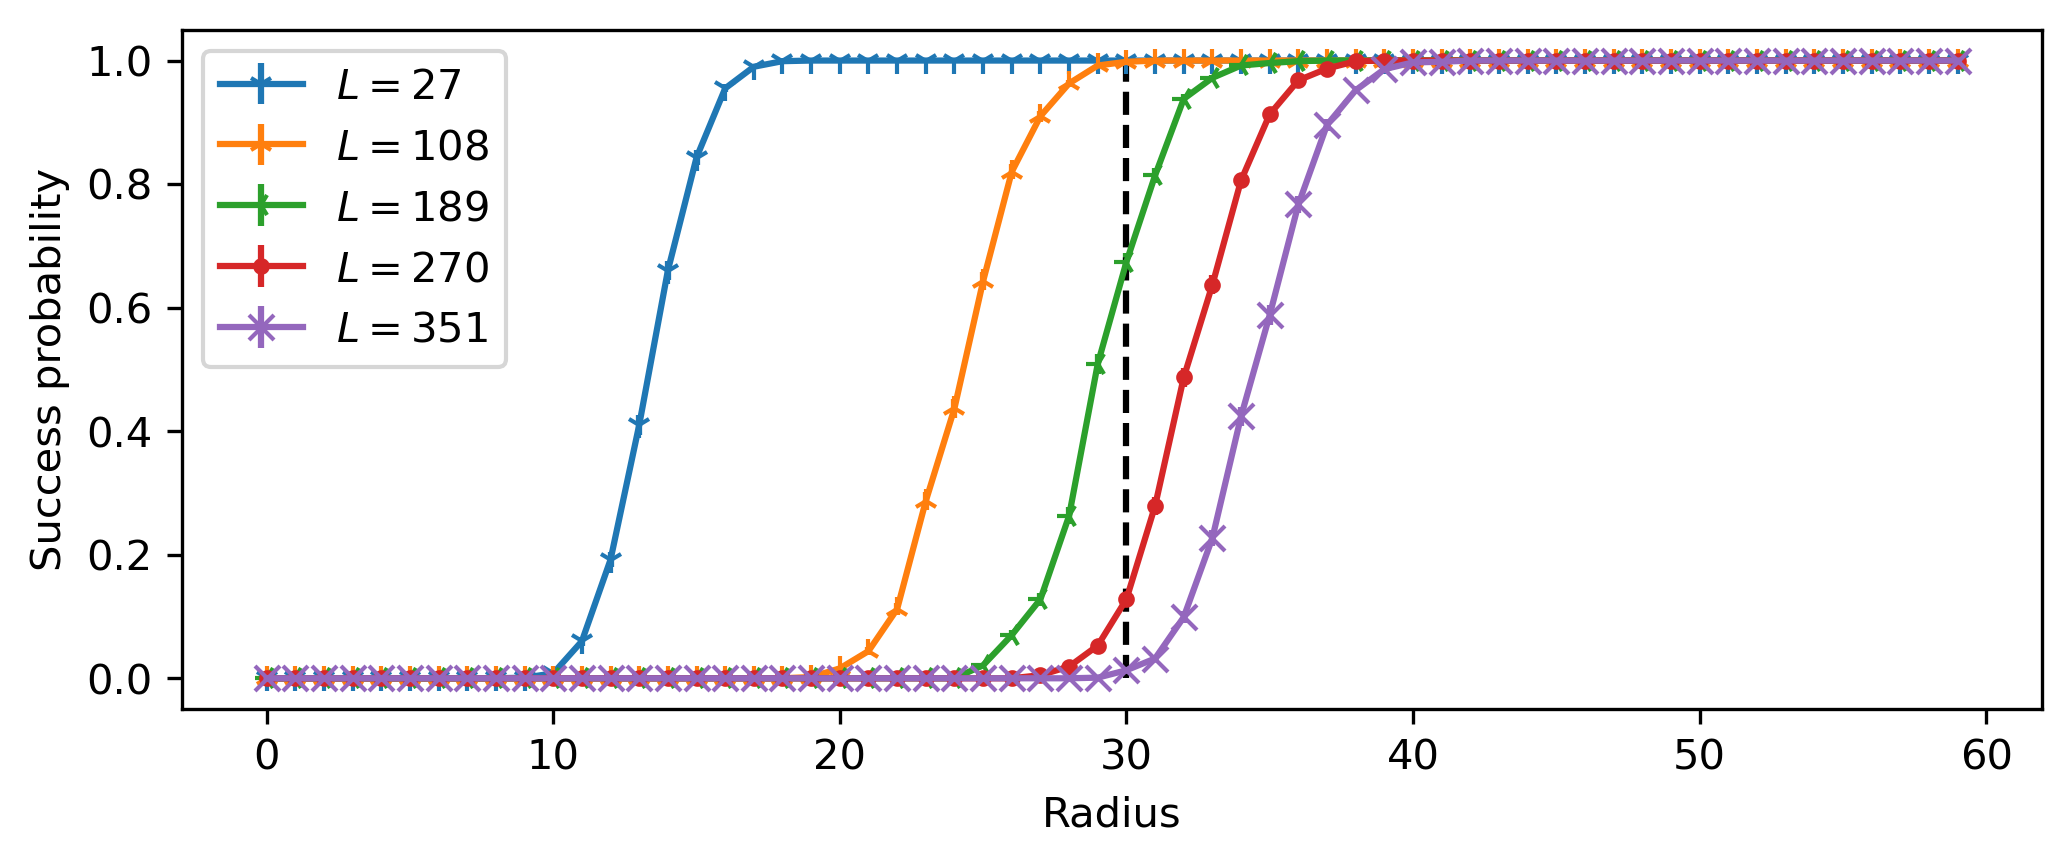

In [123]:
markers = ['1', '2', '3', '.', 'x']
for r_res, dl, mark, cl in zip(all_res, delta_list, markers, L_list):
    data_succ_prob, _ = process_results(r_res)
    plt.errorbar(grid, data_succ_prob[0], yerr=data_succ_prob[1], marker=mark, label=f"$L={cl}$")

plt.vlines(lsh_params['r1'], 0, 1, linestyles='dashed', color='black')
# plt.title(f"Success probability vs target radius")
plt.legend()
# plt.ylim(-0.1, 1.1)
plt.xlabel("Radius")
plt.ylabel("Success probability")
save_fig("delta-comparison")
plt.show()


### Success probability vs number of hash functions

In [25]:
l_list = np.linspace(1, 500, 20, endpoint=True)
points = np.zeros((n, d), dtype=int)
nn_checker = skln.KDTree(points, metric='l1')

l_all_res = []

for cur_l in tqdm(l_list):
    iters_per_point = 300
    cur_res = []
    for i in range(iters_per_point):
        lsh = HammingLSH(points, r1, r2, l=int(cur_l))
        cur_res.append(run_exp_fast(r1))
    l_all_res.append(cur_res)

  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
failure_prob = []
mean_queries = np.zeros(len(l_all_res))
err_queries = np.zeros(len(l_all_res))
# bars_queries = [np.zeros(len(r_res)), np.zeros(len(r_res))]
for i, v in enumerate(l_all_res):
    f_pr = sum(1 - e[0] for e in v) / len(v)
    failure_prob.append(f_pr)
    queries = [e[1] for e in v]
    mean_queries[i] = np.mean(queries)
#     bars_queries[0][i] = np.percentile(queries, 90)
#     bars_queries[1][i] = np.percentile(queries, 10)
    err_queries[i] = np.std(queries)


# bars_queries[0] -= mean_queries
# bars_queries[1] = mean_queries - bars_queries[1]

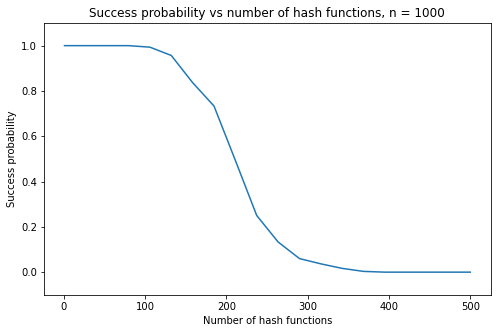

In [33]:
plt.plot(l_list, 1 - np.array(failure_prob))
plt.title(f"Success probability vs number of hash functions, n = {n}")
plt.ylim(-0.1, 1.1)
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("Number of hash functions")
plt.ylabel("Success probability")
plt.show()

### Number of queries vs $1/\delta$

In [125]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "zero",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/2,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'max_queries': 80000,
    'max_resamples': 40000,
}

In [126]:
delta_list = np.logspace(1, 8, 8, endpoint=True, base=1/2)
my_rho = np.log(1 - lsh_params['r1']/point_params['d']) / np.log(1 - lsh_params['r2']/point_params['d'])
my_L = int(np.ceil(np.power(point_params['n'], my_rho)))
L_list = np.arange(1, 9) * my_L

delta_adapt_res = []

# for cur_delta in tqdm(delta_list):
#     iters_per_point = 100
#     cur_res = []
#     for i in range(iters_per_point):
#         lsh = HammingLSH(points, r1, r2, delta=cur_delta)
#         cur_res.append(run_exp_fast(points[0], r1, nn_checker, lsh, max_resamples=30))
#     delta_res.append(cur_res)

for dl in tqdm(delta_list):
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    cur_res = run_experiments(env, point_params, new_lsh_params, exp_params, data_dir=DATA_DIR)
    delta_adapt_res.append(cur_res)

  0%|          | 0/8 [00:00<?, ?it/s]

In [127]:
delta_list = np.logspace(1, 8, 8, endpoint=True, base=1/2)
delta_rand_res = []

for dl in tqdm(delta_list):
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    new_exp_params = exp_params.copy()
    new_exp_params['alg_type'] = 'random'
    cur_res = run_experiments(env, point_params, new_lsh_params, new_exp_params, data_dir=DATA_DIR)
    delta_rand_res.append(cur_res)

  0%|          | 0/8 [00:00<?, ?it/s]

In [128]:
adapt_succ_prob, adapt_queries = process_results(delta_adapt_res)
rand_succ_prob, rand_queries = process_results(delta_rand_res)

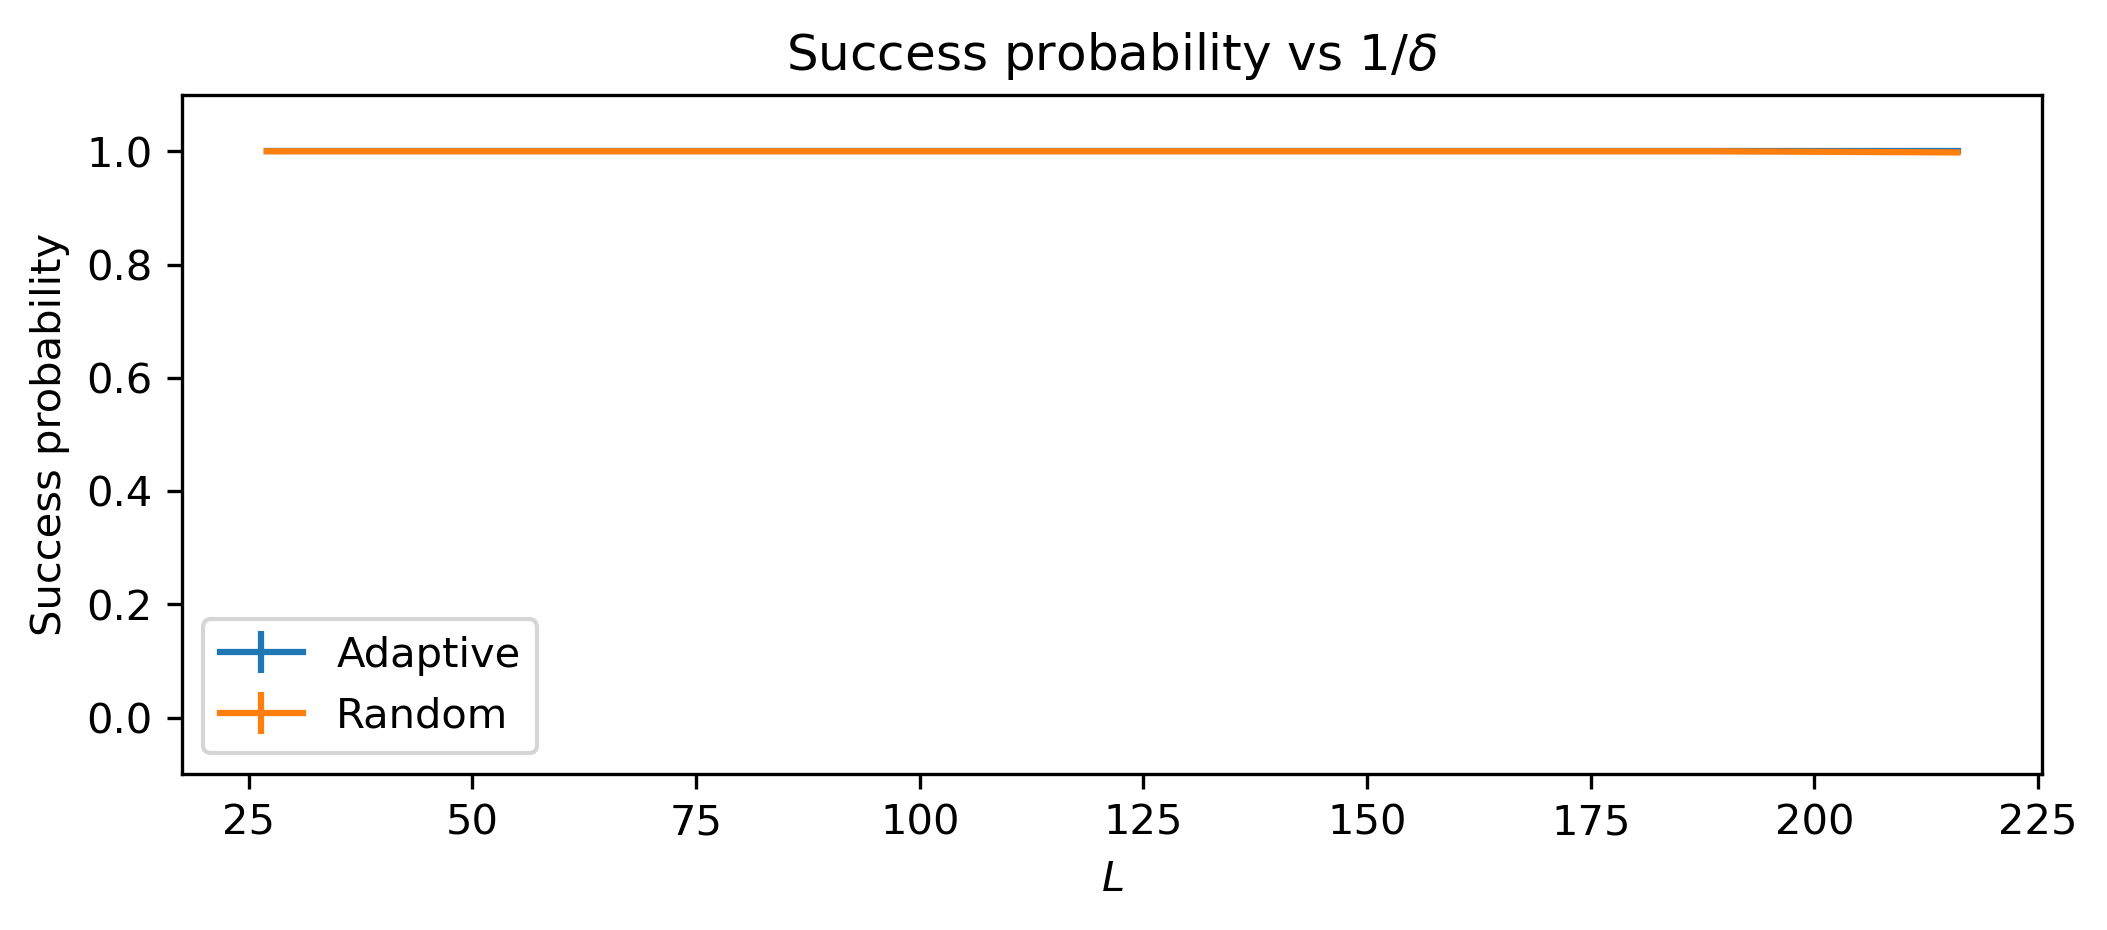

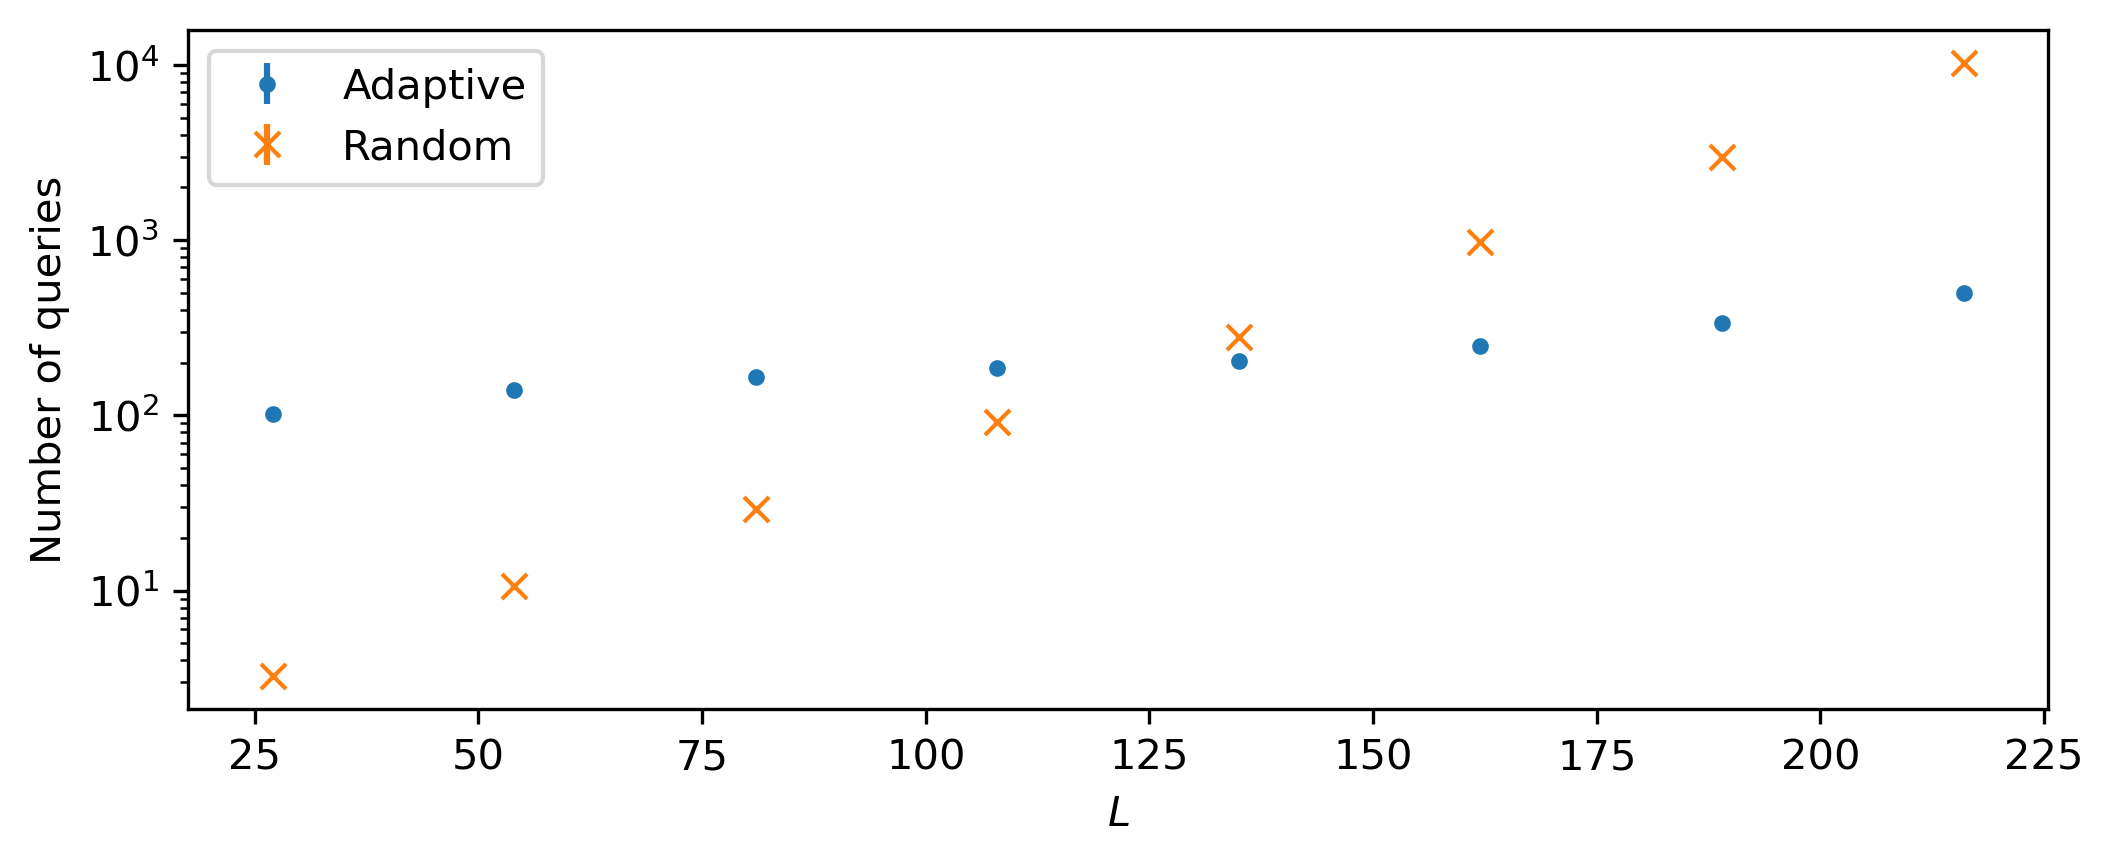

In [129]:
plt.errorbar(L_list, adapt_succ_prob[0], yerr=adapt_succ_prob[1], label="Adaptive")
plt.errorbar(L_list, rand_succ_prob[0], yerr=rand_succ_prob[1], label="Random")
plt.legend()
plt.title(f"Success probability vs $1/\delta$")
plt.ylim(-0.1, 1.1)
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("$L$")
plt.ylabel("Success probability")
plt.show()

plt.errorbar(L_list, adapt_queries[0], yerr=adapt_queries[1], label="Adaptive", marker='.', linestyle='None')
plt.errorbar(L_list, rand_queries[0], yerr=rand_queries[1], label="Random", marker='x', linestyle='None')
# plt.plot(1 / delta_list, rand_mean_queries / (1 - np.array(rand_failure_prob)), label="Random projected")
plt.legend()
# plt.title(f"Number of queries vs $1/\delta$")
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("$L$")
plt.ylabel("Number of queries")
save_fig("both_queries-delta")
plt.show()

# plt.errorbar(1 / delta_list, mean_queries, yerr=err_queries, label="Adaptive")
# plt.errorbar(1 / delta_list, rand_mean_queries, yerr=rand_err_queries, label="Random")
# plt.plot(1 / delta_list, rand_mean_queries / (1 - np.array(rand_failure_prob)), label="Random projected")
# plt.legend()
# plt.title(f"Number of queries vs $1/\delta$, n = {n}")
# # plt.yscale("log")
# plt.xscale("log")
# plt.xlabel("$1 / \delta$")
# plt.ylabel("Number of queries")
# plt.show()

$X_i$ value of experiment $i$
$$1/n \cdot \sum_{i} X_i$$
error bar $$ 1/\sqrt{n} \cdot Var(X_i)$$

# Size of $G(q,z)$

In [6]:
t = 10

In [7]:
print(r1, r2, t, n, d)

30 60 10 1000 300


In [11]:
points = np.zeros((n, d))

z = np.zeros(d)

In [29]:
grid = np.arange(0, r2)

num_samples = 10
res = []
for dist in tqdm(grid):
    q = np.zeros(d)
    q[:dist] = 1
    cur_res = []
    for i in range(num_samples):
        lsh = HammingLSH(points, r1, r2, delta)
        cur_res.append(lsh.cnt_mutual_buckets(q, z))
    res.append(cur_res)

  0%|          | 0/60 [00:00<?, ?it/s]

In [40]:
frac_res = np.array(res) / lsh._l
means = np.mean(frac_res, axis=1)
err = np.std(frac_res, axis=1)

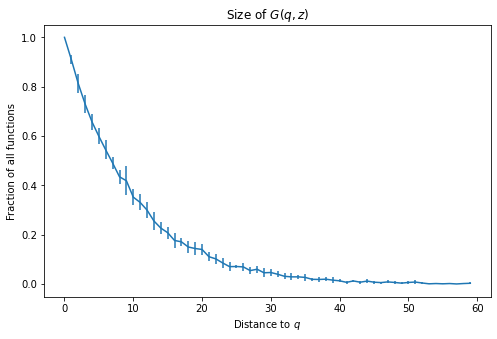

In [42]:
plt.errorbar(grid, means, yerr=err)
# plt.yscale("log")
plt.title("Size of $G(q, z)$")
plt.xlabel("Distance to $q$")
plt.ylabel("Fraction of all functions")
plt.show()

# Random points

### Analysing dependance on radius

In [148]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "random",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/5,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'change_points': True,
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

In [149]:
grid = np.arange(0, lsh_params['r1'], 1)
res = run_basic_grid_experiment(grid, 'target_distance', env, point_params, lsh_params, exp_params, data_dir=DATA_DIR)

  0%|          | 0/30 [00:00<?, ?it/s]

In [150]:
data_succ_prob, data_queries = process_results(res)

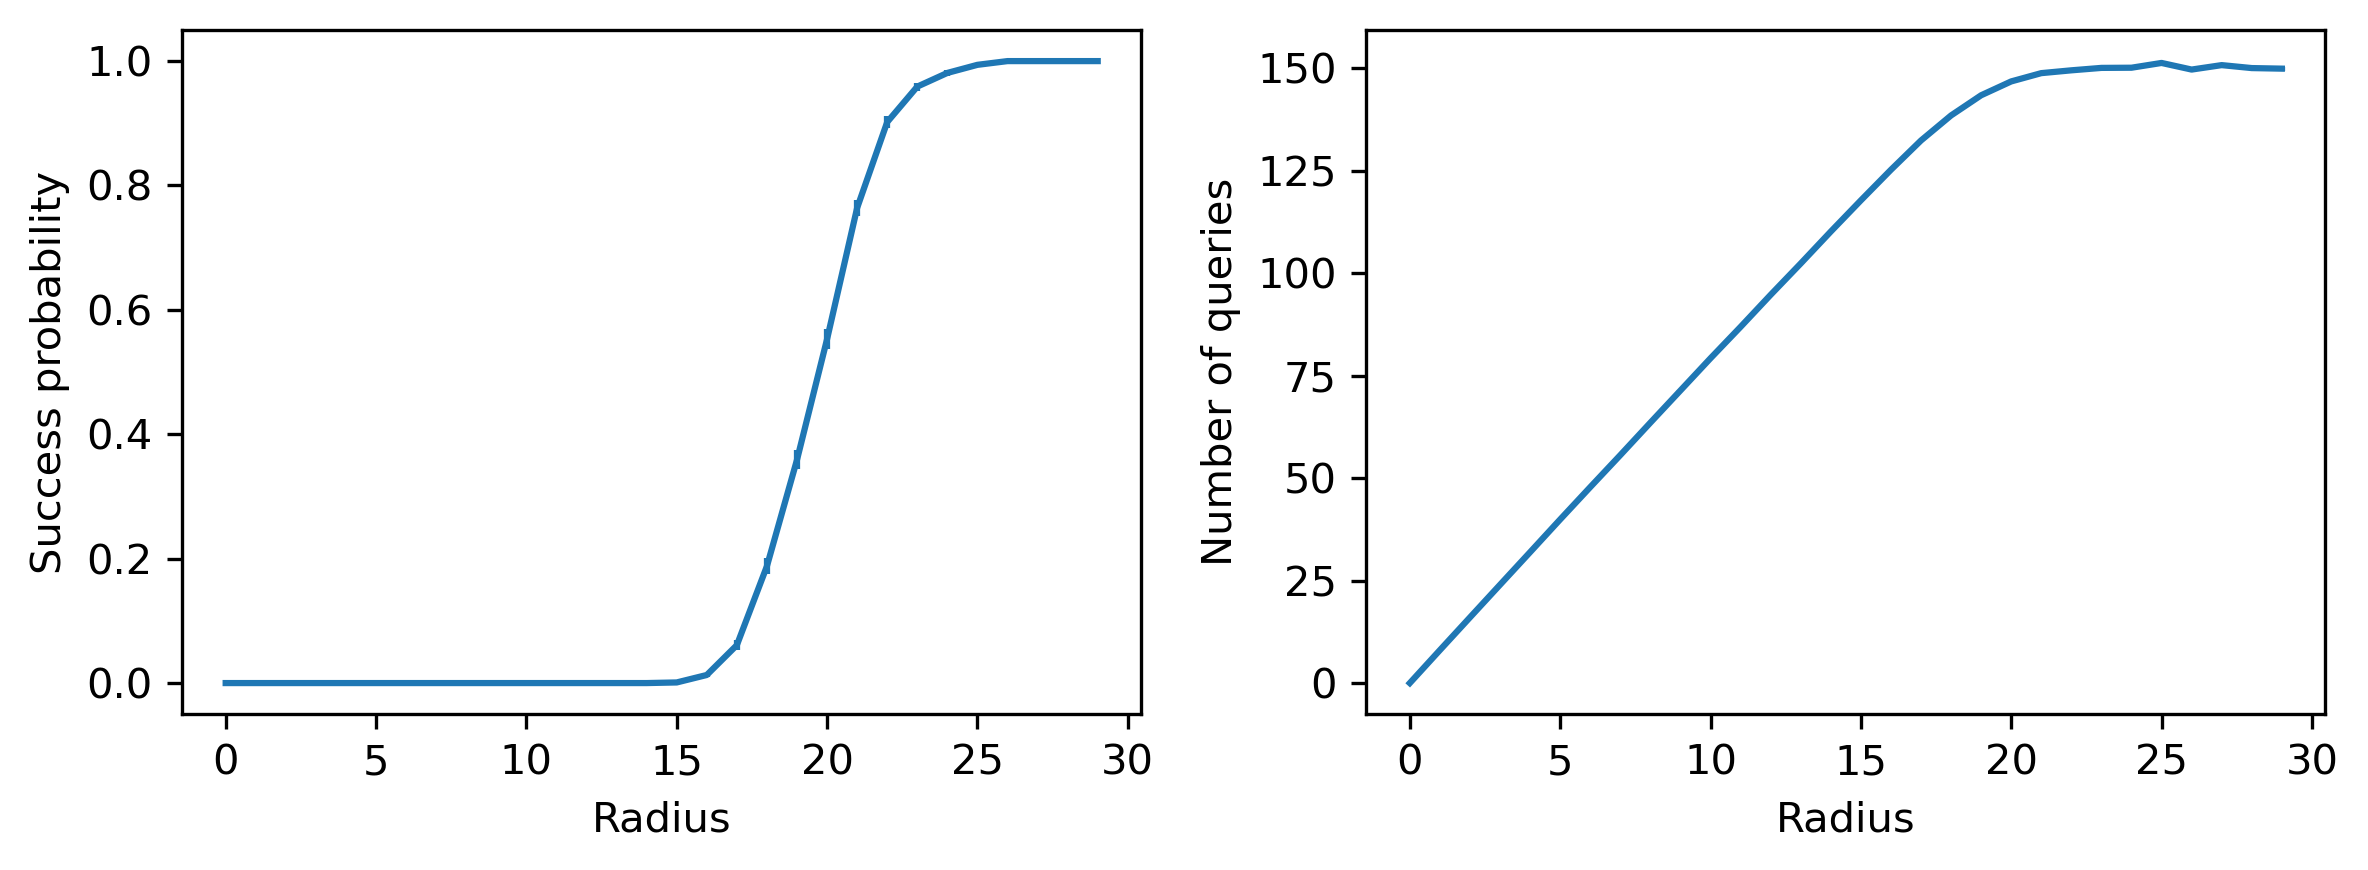

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].errorbar(grid, data_succ_prob[0], yerr=data_succ_prob[1])
# plt.xlim(xlims)
# plt.yscale("log")
axs[0].set_xlabel("Radius")
axs[0].set_ylabel("Success probability")

axs[1].errorbar(grid, data_queries[0], yerr=data_queries[1])
# plt.xlim(xlims)
axs[1].set_xlabel("Radius")
axs[1].set_ylabel("Number of queries")

fig.tight_layout()
# save_fig("all-all-starting-distance")
save_fig("all-radius-randpoint")
plt.show()

### Search for infliction point

In [152]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "random",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/2,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'change_points': True,
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
}

In [153]:
help_list = np.arange(1, 14, 3)
delta_list = np.exp2(-help_list)

my_rho = np.log(1 - lsh_params['r1']/point_params['d']) / np.log(1 - lsh_params['r2']/point_params['d'])
my_L = int(np.ceil(np.power(point_params['n'], my_rho)))
L_list = help_list * my_L

grid = np.arange(0, lsh_params['r2'], 1)

all_res = []

for dl in delta_list:
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    res = run_basic_grid_experiment(grid, 'target_distance', env, point_params, new_lsh_params, exp_params, data_dir=DATA_DIR)
    all_res.append(res)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

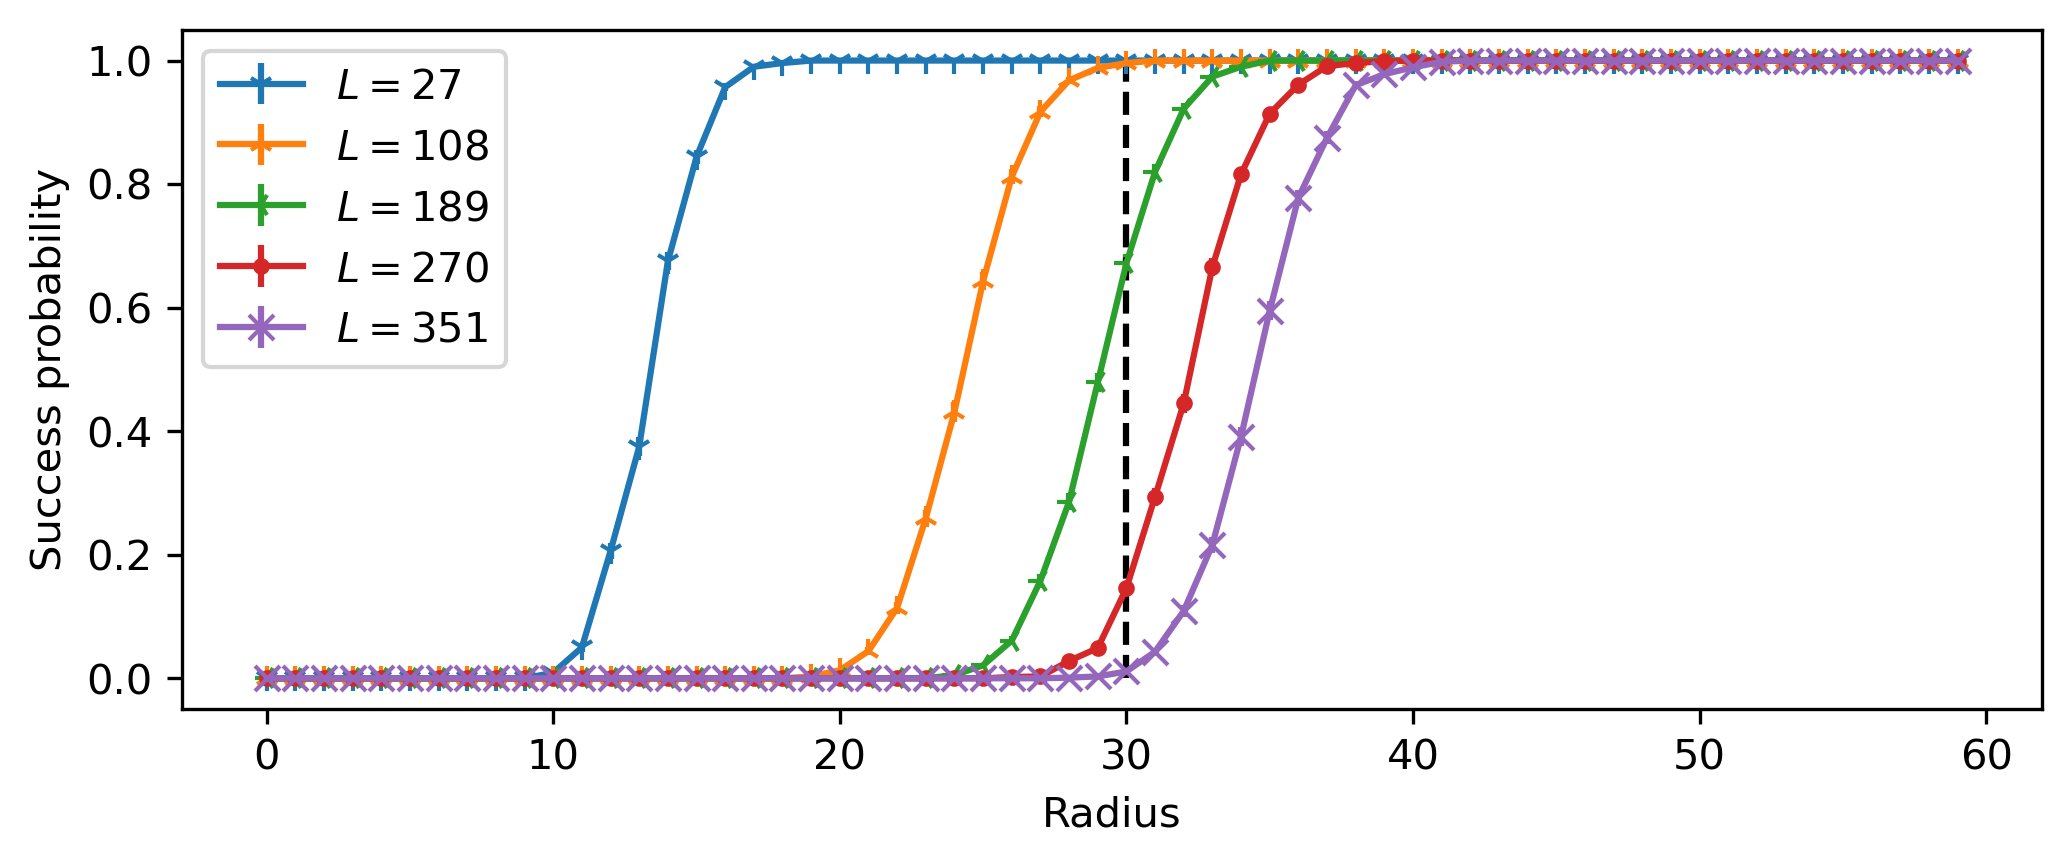

In [154]:
markers = ['1', '2', '3', '.', 'x']
for r_res, dl, mark, cl in zip(all_res, delta_list, markers, L_list):
    data_succ_prob, _ = process_results(r_res)
    plt.errorbar(grid, data_succ_prob[0], yerr=data_succ_prob[1], marker=mark, label=f"$L={cl}$")

plt.vlines(lsh_params['r1'], 0, 1, linestyles='dashed', color='black')
# plt.title(f"Success probability vs target radius")
plt.legend()
# plt.ylim(-0.1, 1.1)
plt.xlabel("Radius")
plt.ylabel("Success probability")
save_fig("delta-comparison-randpoint")
plt.show()


### Number of queries vs $1/\delta$

In [155]:
env = Environment()

point_params = {
    'n': 1000,
    'd': 300,
    'point_type': "random",
    'seed_offset': 0
}

lsh_params = {
    'delta': 1/2,
    'seed_offset': 0,
    'r1': point_params['d'] // 10,
    'r2': point_params['d'] // 5
}

exp_params = {
    'alg_type': 'adaptive',
    'change_points': True,
    'iter_num': 1000,
    'seed_offset': 0,
    'target_distance': lsh_params['r1'],
    'max_queries': 80000,
    'max_resamples': 40000,
}

In [156]:
delta_list = np.logspace(1, 8, 8, endpoint=True, base=1/2)
my_rho = np.log(1 - lsh_params['r1']/point_params['d']) / np.log(1 - lsh_params['r2']/point_params['d'])
my_L = int(np.ceil(np.power(point_params['n'], my_rho)))
L_list = np.arange(1, 9) * my_L

delta_adapt_res = []

# for cur_delta in tqdm(delta_list):
#     iters_per_point = 100
#     cur_res = []
#     for i in range(iters_per_point):
#         lsh = HammingLSH(points, r1, r2, delta=cur_delta)
#         cur_res.append(run_exp_fast(points[0], r1, nn_checker, lsh, max_resamples=30))
#     delta_res.append(cur_res)

for dl in tqdm(delta_list):
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    cur_res = run_experiments(env, point_params, new_lsh_params, exp_params, data_dir=DATA_DIR)
    delta_adapt_res.append(cur_res)

  0%|          | 0/8 [00:00<?, ?it/s]

In [157]:
delta_list = np.logspace(1, 8, 8, endpoint=True, base=1/2)
delta_rand_res = []

for dl in tqdm(delta_list):
    new_lsh_params = lsh_params.copy()
    new_lsh_params['delta'] = dl
    new_exp_params = exp_params.copy()
    new_exp_params['alg_type'] = 'random'
    cur_res = run_experiments(env, point_params, new_lsh_params, new_exp_params, data_dir=DATA_DIR)
    delta_rand_res.append(cur_res)

  0%|          | 0/8 [00:00<?, ?it/s]

In [158]:
adapt_succ_prob, adapt_queries = process_results(delta_adapt_res)
rand_succ_prob, rand_queries = process_results(delta_rand_res)

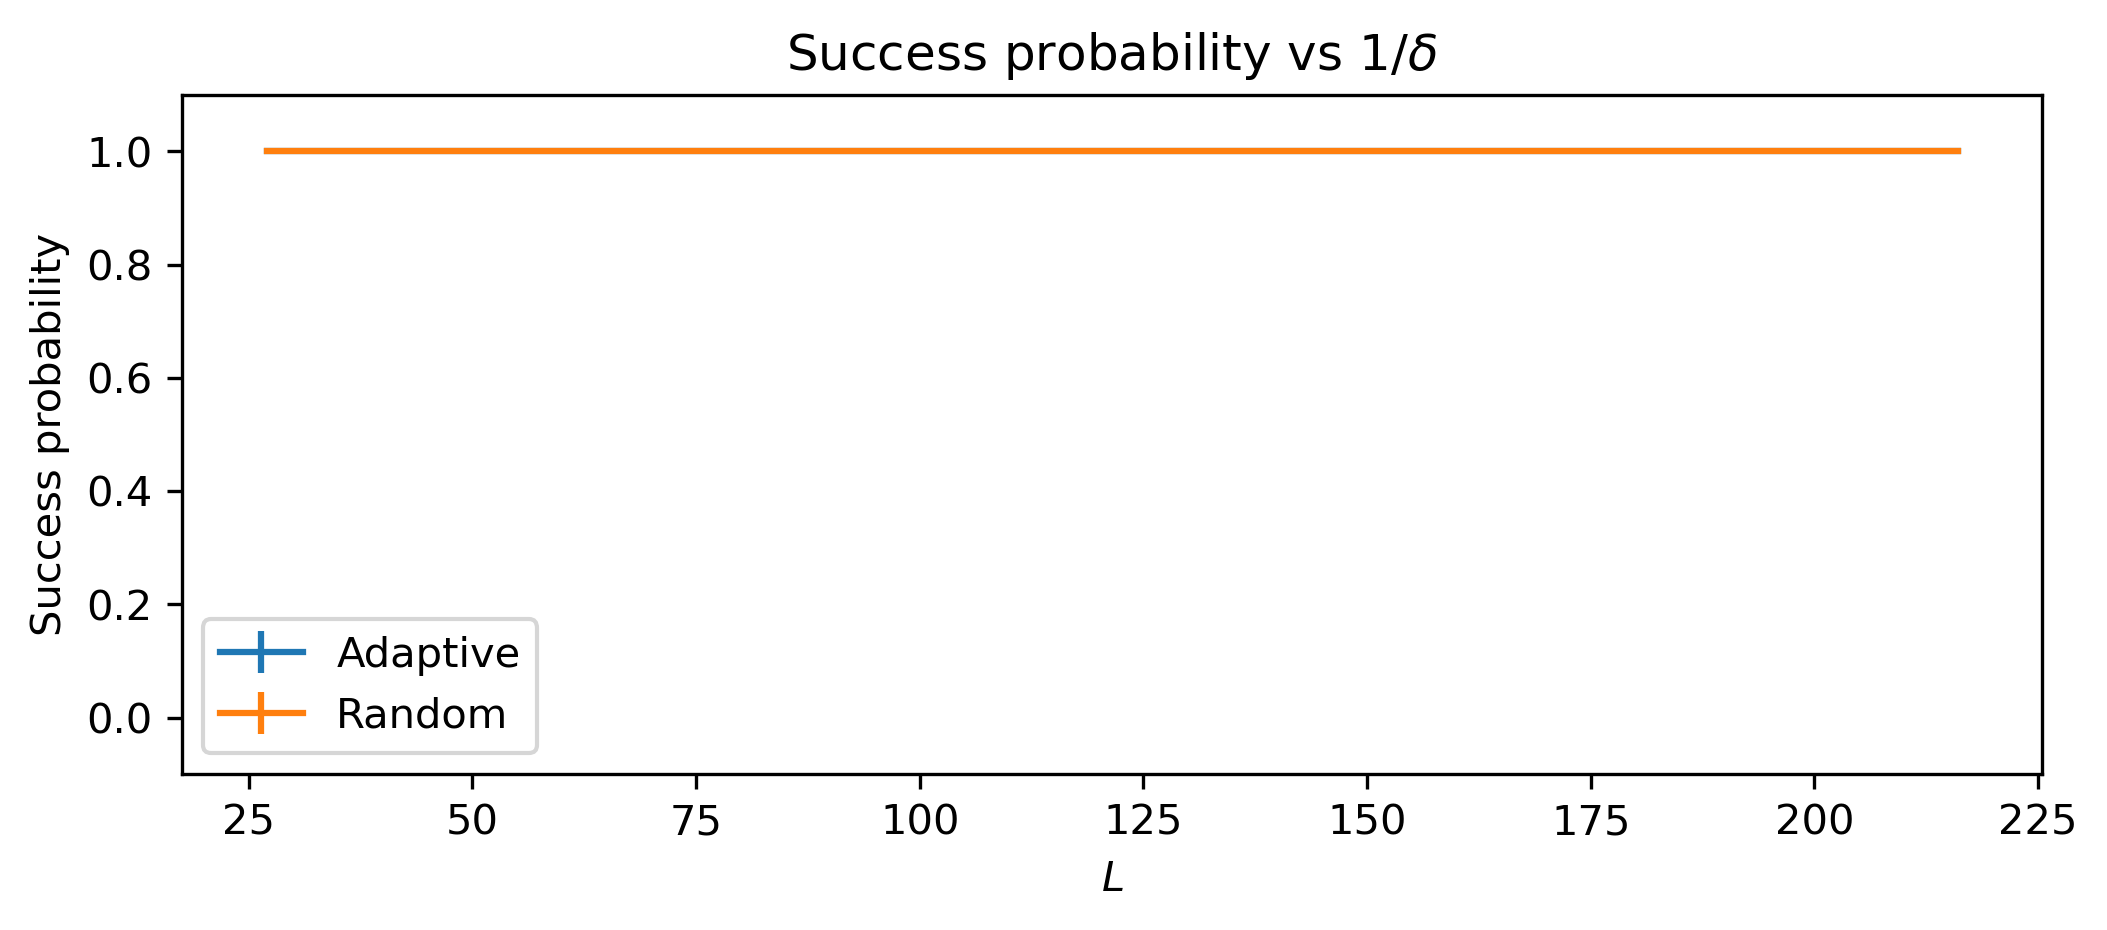

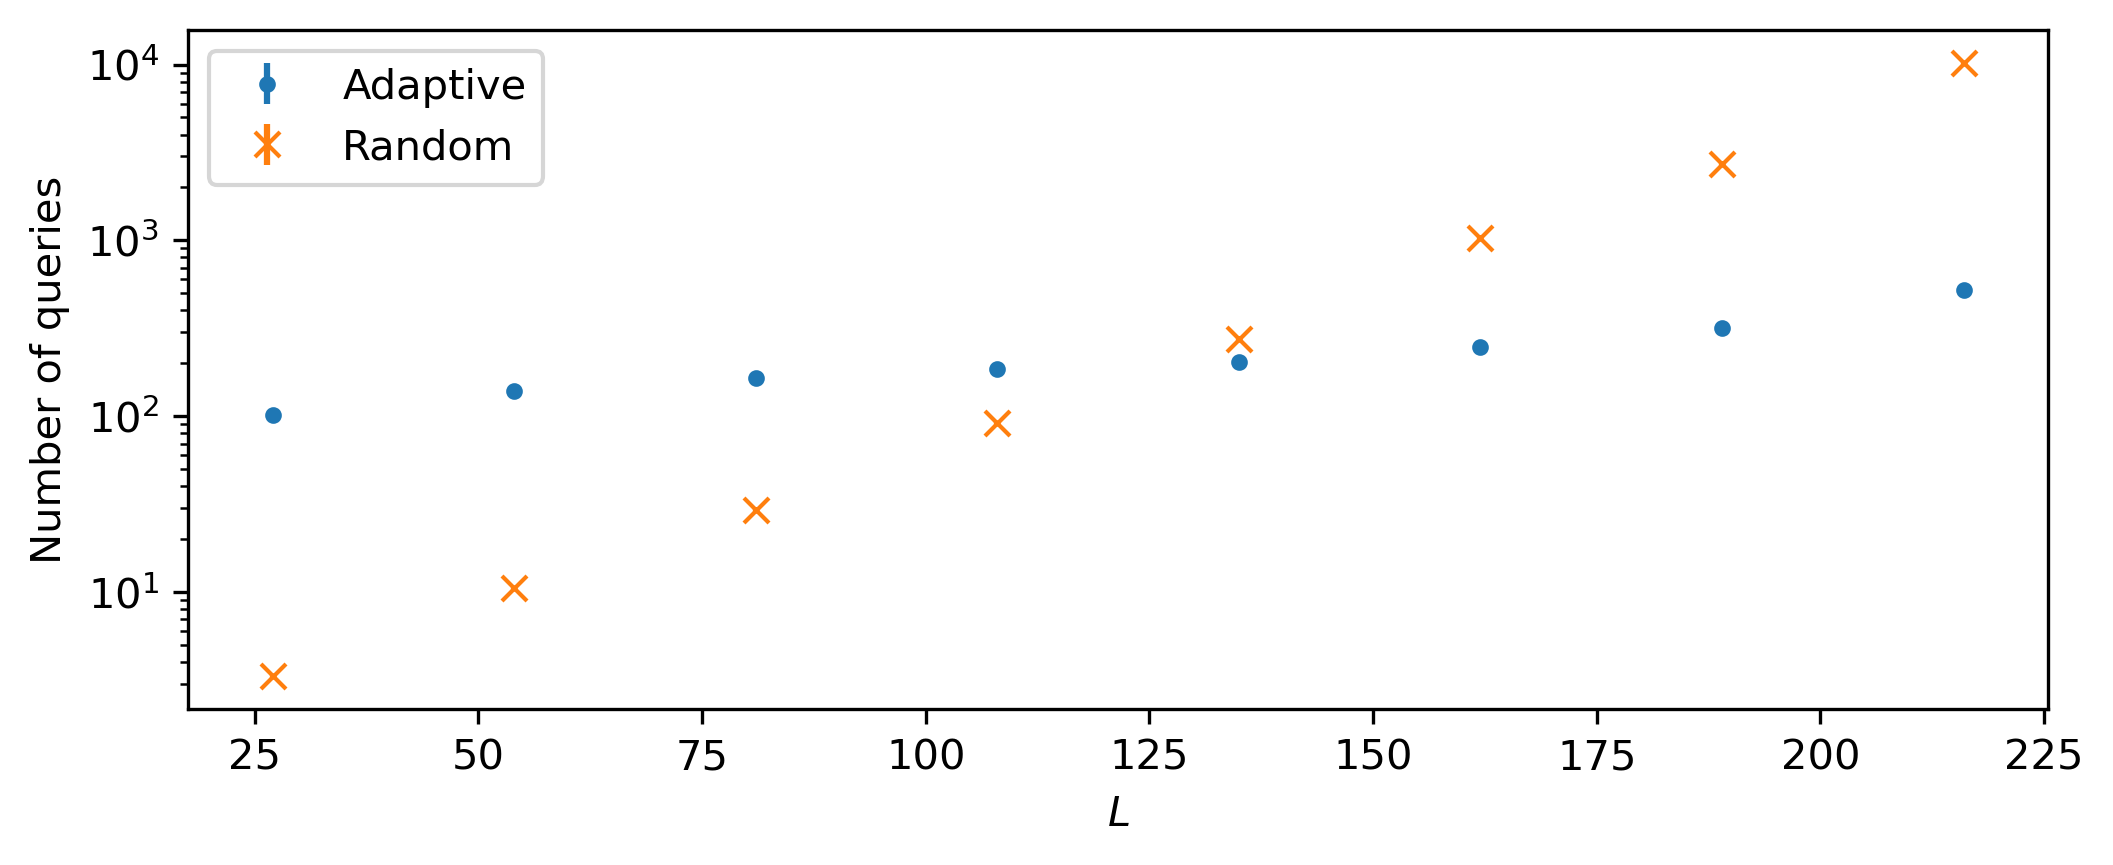

In [159]:
plt.errorbar(L_list, adapt_succ_prob[0], yerr=adapt_succ_prob[1], label="Adaptive")
plt.errorbar(L_list, rand_succ_prob[0], yerr=rand_succ_prob[1], label="Random")
plt.legend()
plt.title(f"Success probability vs $1/\delta$")
plt.ylim(-0.1, 1.1)
# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("$L$")
plt.ylabel("Success probability")
plt.show()

plt.errorbar(L_list, adapt_queries[0], yerr=adapt_queries[1], label="Adaptive", marker='.', linestyle='None')
plt.errorbar(L_list, rand_queries[0], yerr=rand_queries[1], label="Random", marker='x', linestyle='None')
# plt.plot(1 / delta_list, rand_mean_queries / (1 - np.array(rand_failure_prob)), label="Random projected")
plt.legend()
# plt.title(f"Number of queries vs $1/\delta$")
plt.yscale("log")
# plt.xscale("log")
plt.xlabel("$L$")
plt.ylabel("Number of queries")
save_fig("both_queries-delta-randpoint")
plt.show()

# plt.errorbar(1 / delta_list, mean_queries, yerr=err_queries, label="Adaptive")
# plt.errorbar(1 / delta_list, rand_mean_queries, yerr=rand_err_queries, label="Random")
# plt.plot(1 / delta_list, rand_mean_queries / (1 - np.array(rand_failure_prob)), label="Random projected")
# plt.legend()
# plt.title(f"Number of queries vs $1/\delta$, n = {n}")
# # plt.yscale("log")
# plt.xscale("log")
# plt.xlabel("$1 / \delta$")
# plt.ylabel("Number of queries")
# plt.show()

In [ ]:
x = np.arange(100)
plt.plot()